# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [79]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [80]:
data = pd.read_csv('orange_small_churn_data.txt', header=0)
labels = pd.read_csv('orange_small_churn_labels.txt', header=None, names=['Churn'])

df = pd.concat([data, labels], axis=1)
df = df.drop(columns=df.columns[df.isna().all()])

# Маски по типам признака
continuous_mask = [x for x in data.iloc[:, :190].columns if x in df.columns]
categorical_mask = [x for x in data.iloc[:, 190:].columns if x in df.columns]

f'Размерность: {df.shape}, Непрерывных признаков: {len(continuous_mask)}, \
Категориальных признаков: {len(categorical_mask)}'

'Размерность: (40000, 213), Непрерывных признаков: 174, Категориальных признаков: 38'

In [81]:
data[continuous_mask].describe().T

,count,mean,std,min,25%,50%,75%,max
Var1,570.0,11.003509,34.952792,0.00,0.000,0.00,16.00,536.00
Var2,1006.0,0.004970,0.157642,0.00,0.000,0.00,0.00,5.00
Var3,1005.0,429.328358,4470.405915,0.00,0.000,0.00,0.00,130668.00
Var4,1275.0,0.148235,1.396054,0.00,0.000,0.00,0.00,27.00
Var5,1165.0,249055.515021,676202.052802,0.00,0.000,0.00,117215.00,6048550.00
...,...,...,...,...,...,...,...,...
Var186,570.0,3.515789,9.412473,0.00,0.000,0.00,6.00,102.00
Var187,570.0,16.056140,54.965050,0.00,0.000,4.00,14.00,910.00
Var188,1006.0,165.108310,113.400173,-6.42,19.380,196.41,250.98,628.62
Var189,16785.0,270.585523,86.723561,6.00,204.000,270.00,330.00,642.00


In [82]:
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Churn
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,-1


2\. Рассчитайте доли классов `отток` и `не отток`.

In [83]:
n_objects, _ = df.shape 
churn_rate = round(np.sum(df.Churn == 1) / n_objects * 100, 2)
non_churn_rate = round(np.sum(df.Churn == -1) / n_objects * 100, 2)

f"Отток: {churn_rate}% Не отток: {non_churn_rate}%"

'Отток: 7.44% Не отток: 92.56%'

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Целевая функция бинарная
Между бинарными - Мэтьюс
Между категориальными - V Крамер
Между неперывными - Пирсон/Спирмен
Между непрерывными и бинарными - E(X1 | X2 = 1) - E(X1 | X2 = -1) -> corr положительная
Между бинарным и категориальным - V Крамер. Бинарный признак рассмотрим как категориальный с двумя значениями. Таблица сопряженности будет размером 2 на кол-во значений признака. Чем больше разница в кол-ве строк и столбцов таблицы, тем вероятнее большое значений коэф. Если разброс между кол-вом строк и столбцов будет небольшим, то значению коэф можно верить. Категориальных признаков относительно не много, мы сможем проверить наше предположение при анализе графиков.
https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V#cite_ref-Ref_cohen_3-0
https://livepcwiki.ru/wiki/Cram%C3%A9r%27s_V

In [153]:
# Расчет корреляции через мат ожидание для непрерывных и бинарных признаков
# Чем больше значение, тем больше корреляция
def corr_by_means(continuous, binary):
    mean1 = np.mean(continuous[binary == 1])
    mean2 = np.mean(continuous[binary == -1])
    
    return mean1 - mean2

# Для категориальных и бинарного 
def corr_v_cramer(categorical, binary):
    # строим таблицу сопряженности
    cross_table = pd.crosstab(categorical, binary)    
    chi2, *_ = chi2_contingency(cross_table, correction=False)
    
    # считаем крамера по хи 2
    n_rows, n_columns = cross_table.shape
    # не по всем признакам хватает данных для построения таблицы 2x2 минимум
    if n_rows < 2:
        return 0.0
    if n_rows > 10:
        return 0.0    
    min_dim = min(n_rows, n_columns) - 1
    n = np.sum(np.array(cross_table)) 
    # при анализе будем учитывать количество категорий
    return np.sqrt((chi2 / n) / min_dim)

corr_continuous = [(feature, corr_by_means(df[feature], df.Churn)) for feature in df[continuous_mask]]
corr_categorical = [(feature, corr_v_cramer(df[feature], df.Churn)) for feature in df[categorical_mask]]

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [137]:
continuous_top20 = np.array(sorted(corr_continuous, key=lambda x: np.abs(x[1]), reverse=True)[:20])[::,0]
continuous_top20

array(['Var131', 'Var69', 'Var53', 'Var177', 'Var180', 'Var114', 'Var111',
       'Var113', 'Var153', 'Var154', 'Var59', 'Var124', 'Var10', 'Var33',
       'Var139', 'Var38', 'Var5', 'Var182', 'Var36', 'Var92'],
      dtype='<U32')

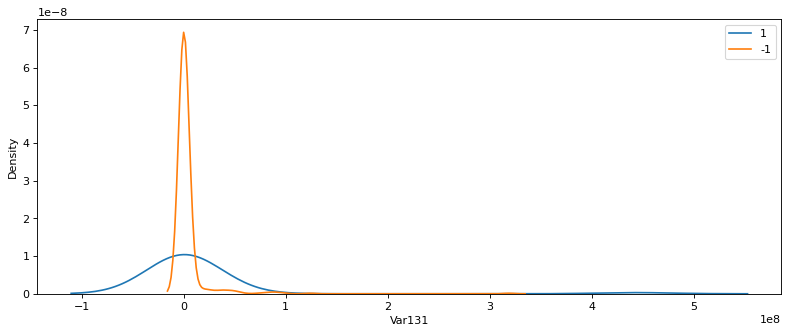

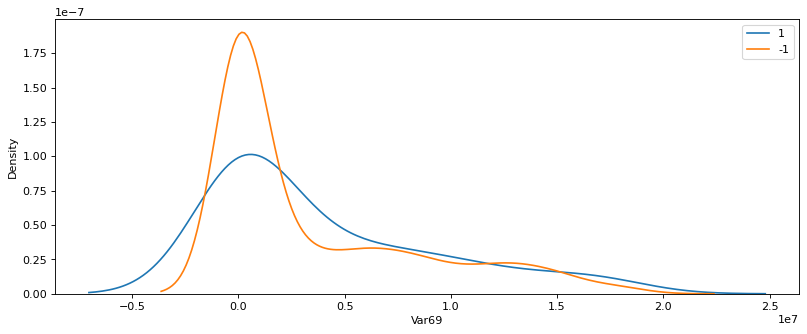

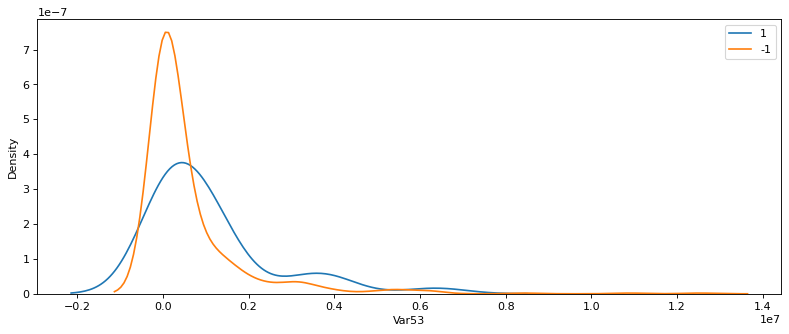

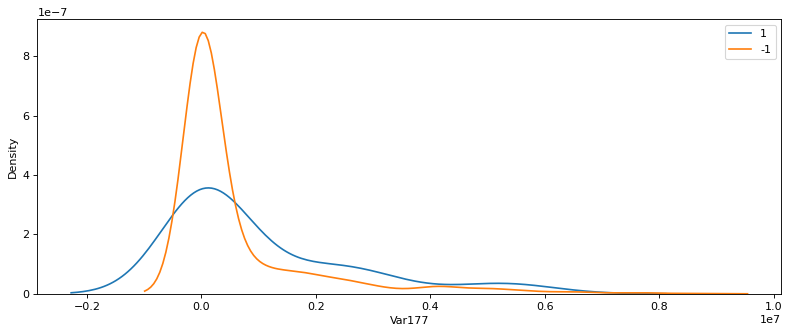

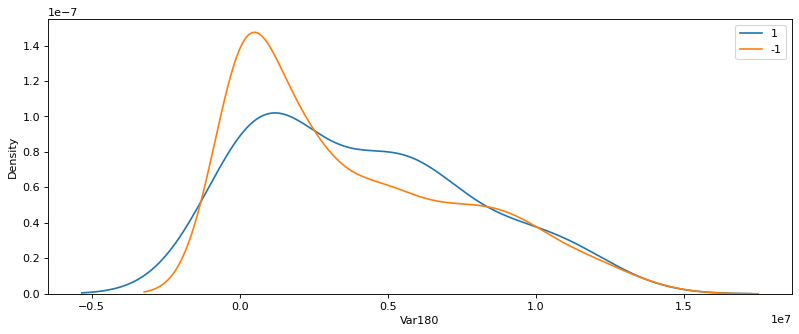

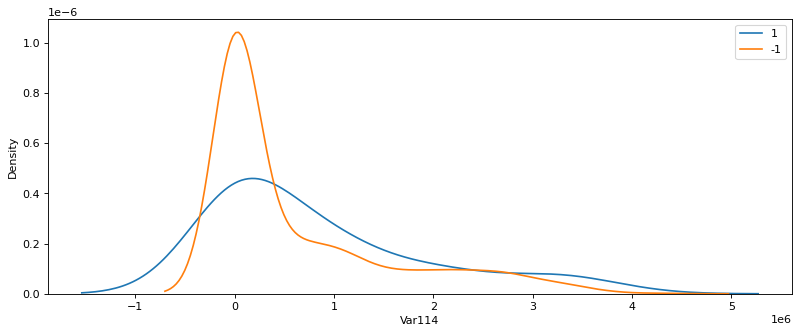

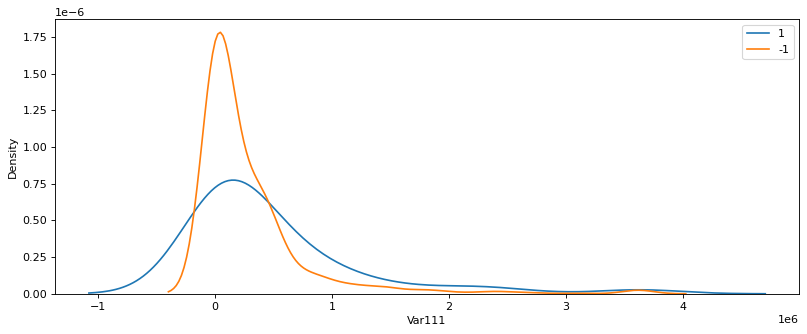

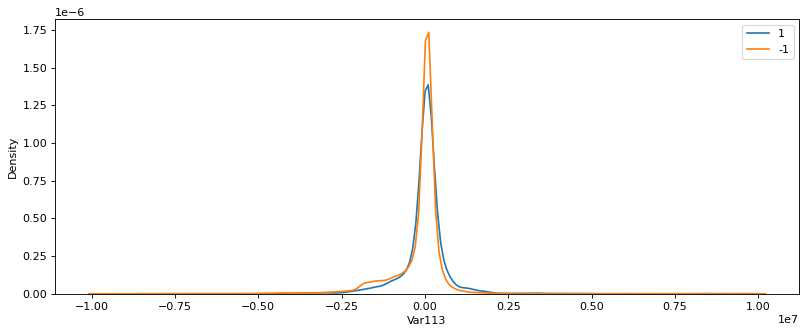

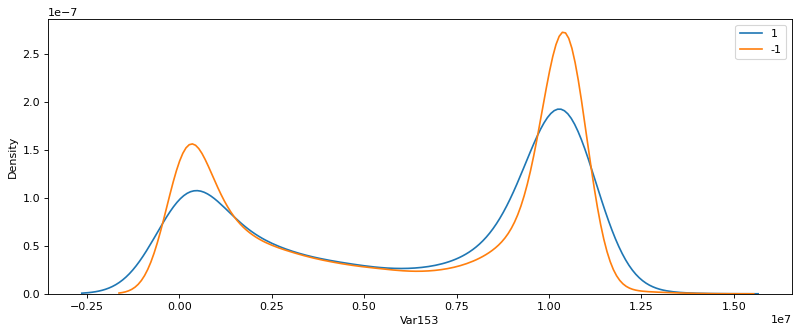

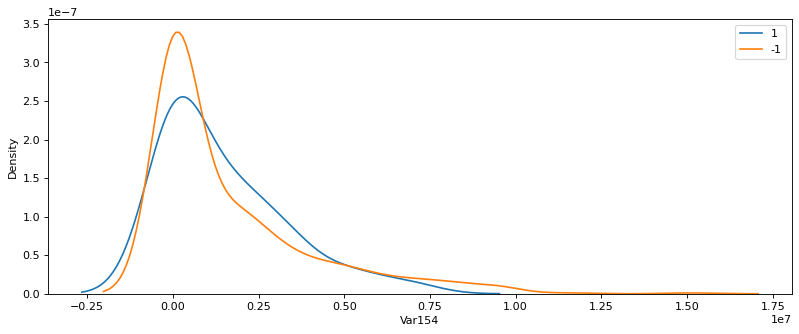

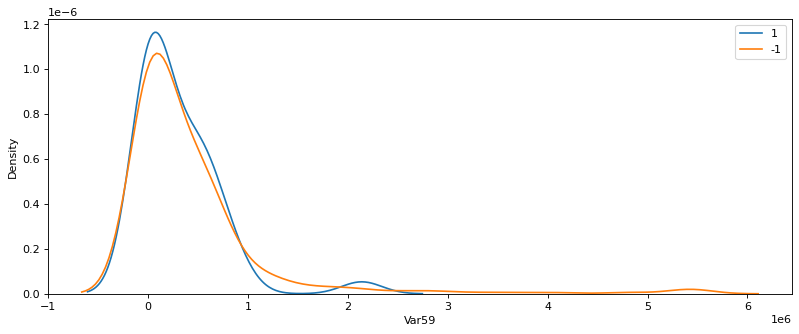

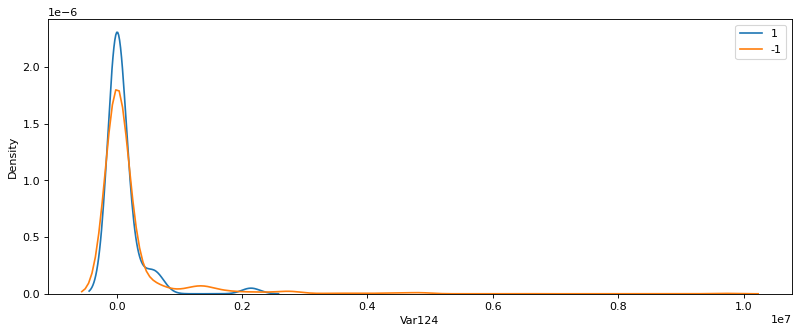

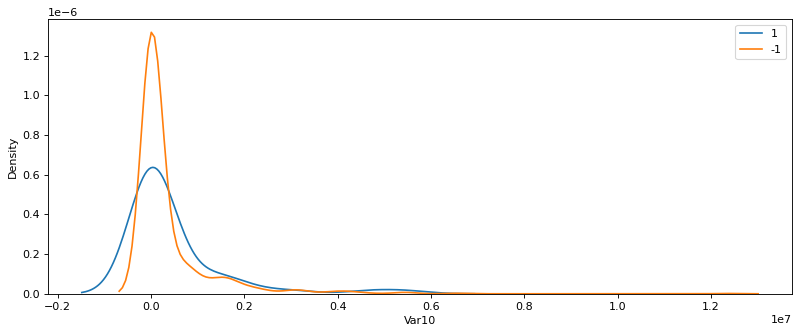

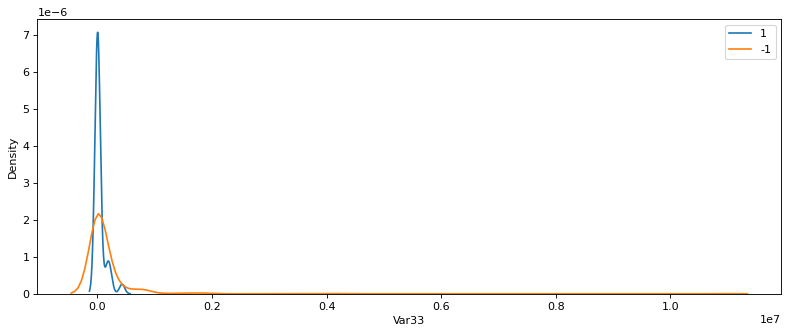

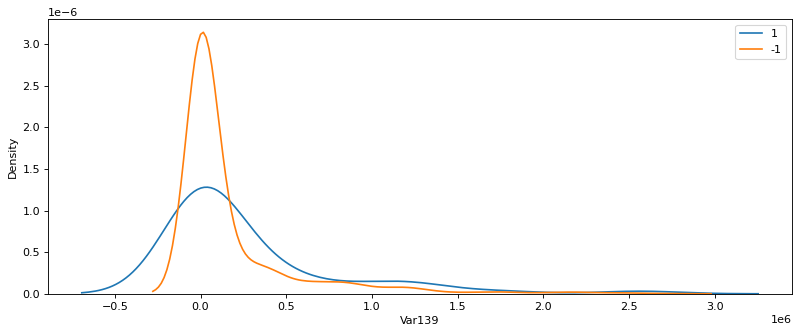

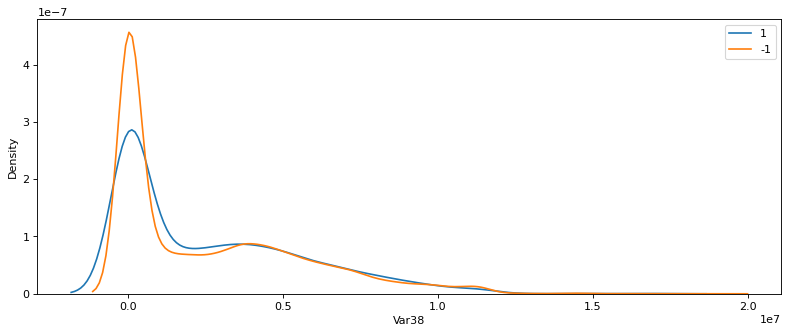

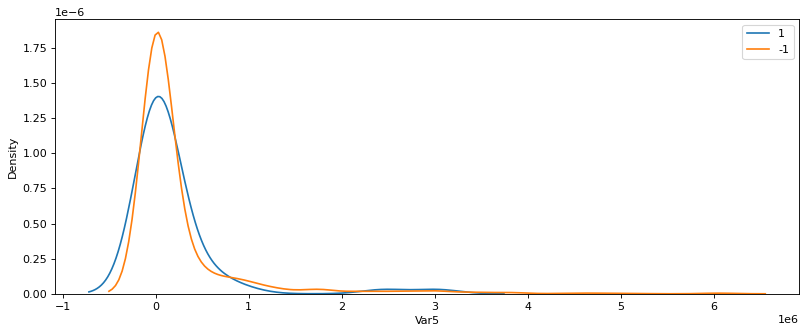

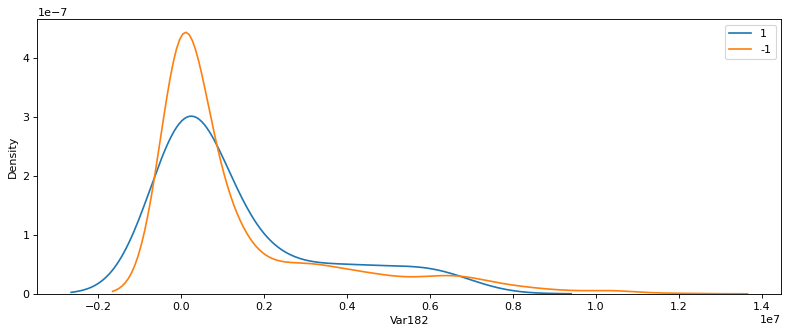

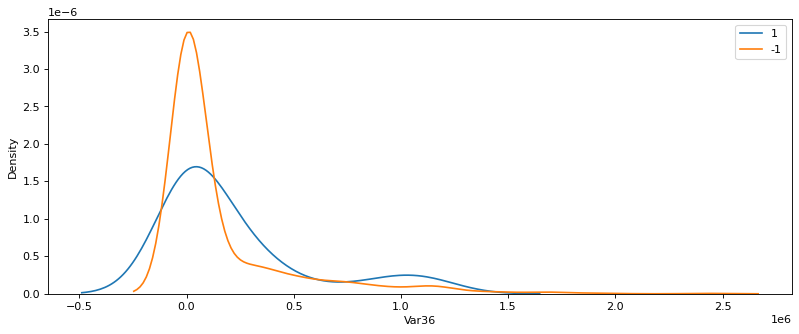

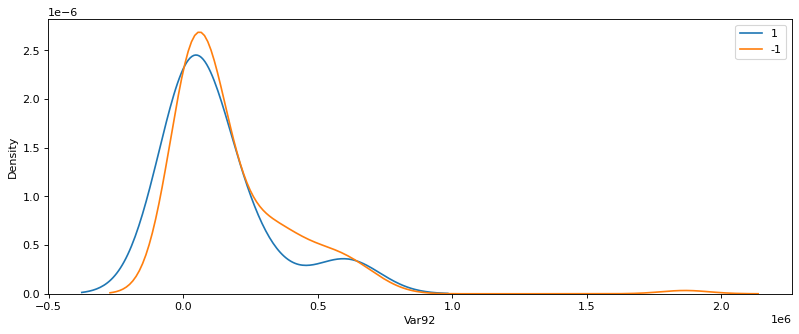

In [113]:
for feature in continuous_top20:
    fig = plt.figure(figsize=(12, 10), dpi=80)
    ax = fig.add_subplot(2, 1, 1)
    sns.kdeplot(data=df[df.Churn == 1], x=feature, ax=ax, label=1)
    sns.kdeplot(data=df[df.Churn == -1], x=feature, ax=ax, label=-1)
    ax.legend()

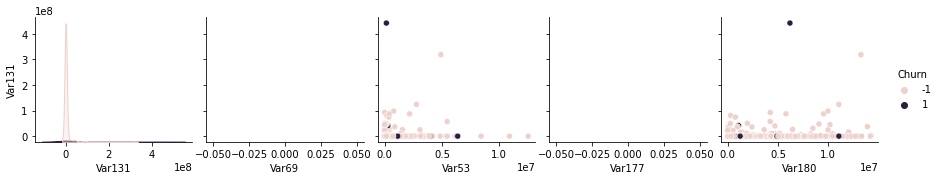

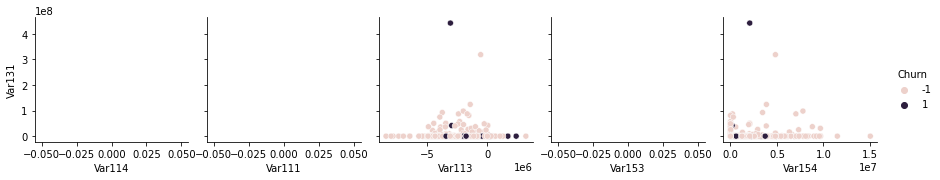

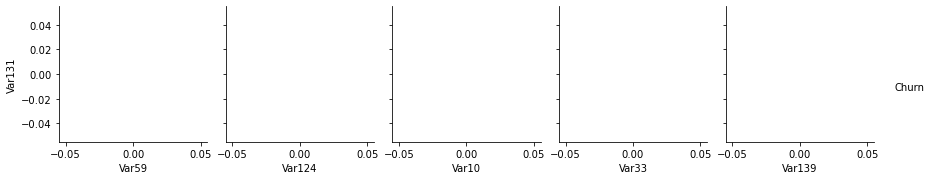

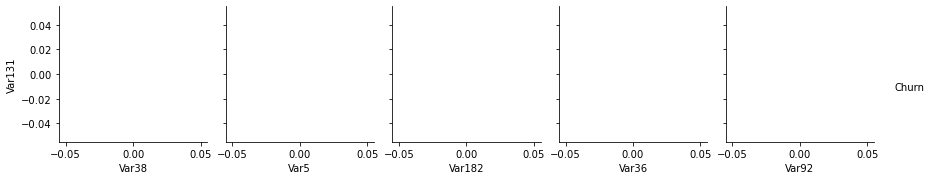

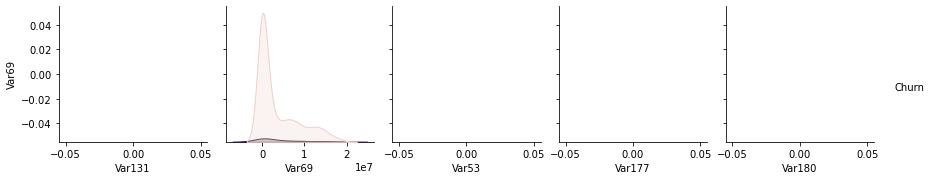

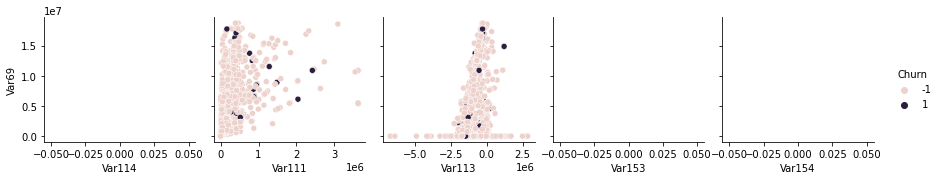

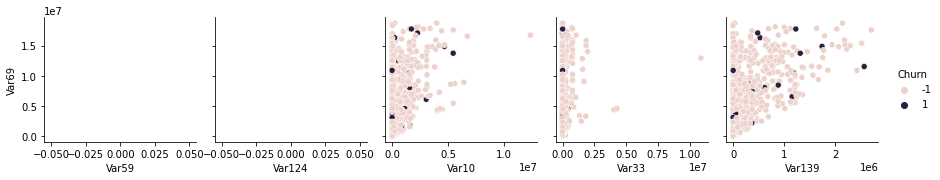

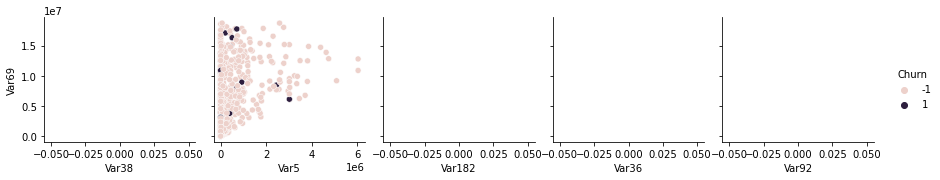

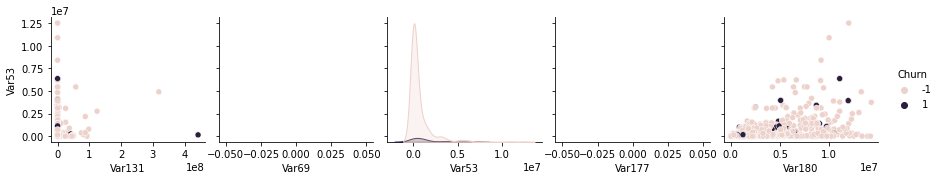

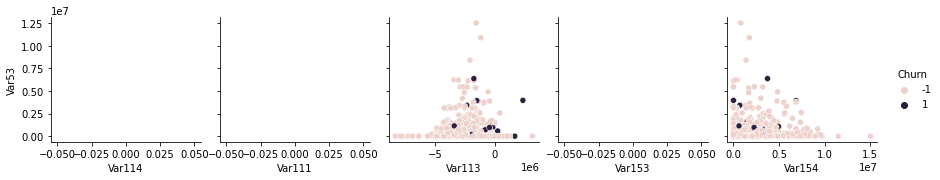

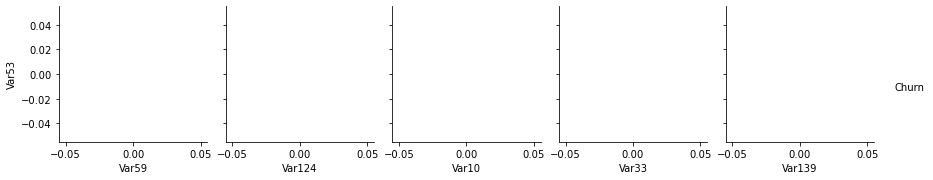

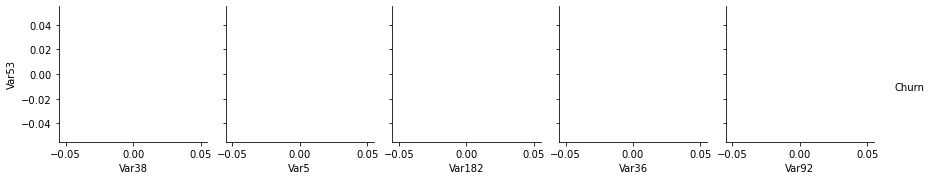

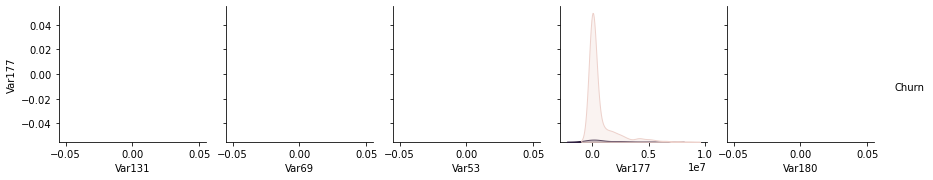

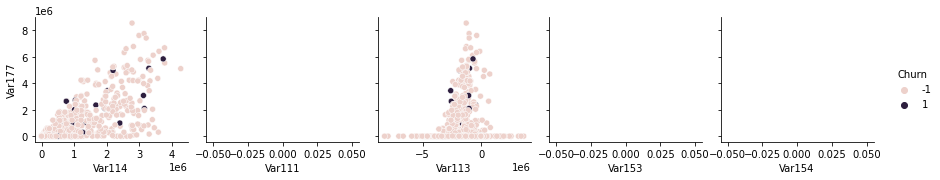

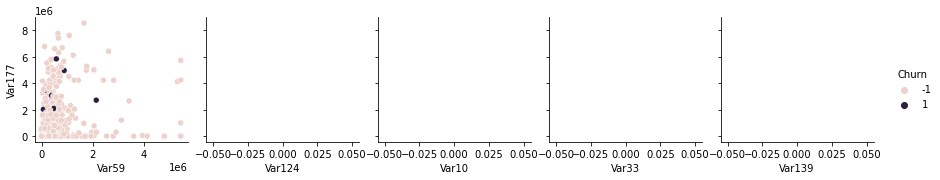

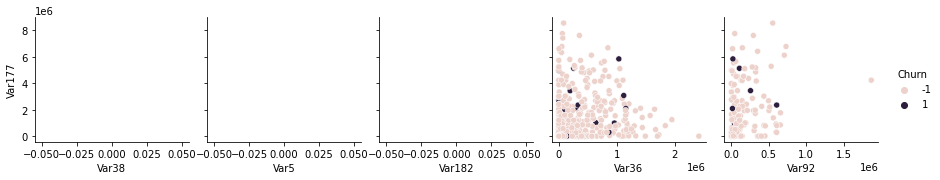

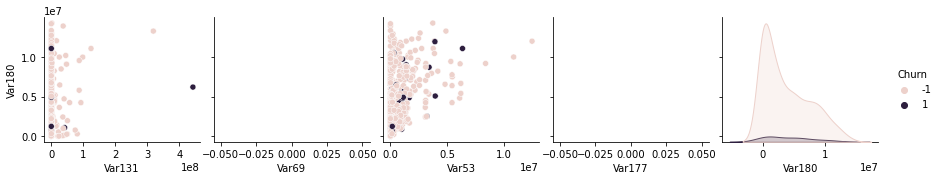

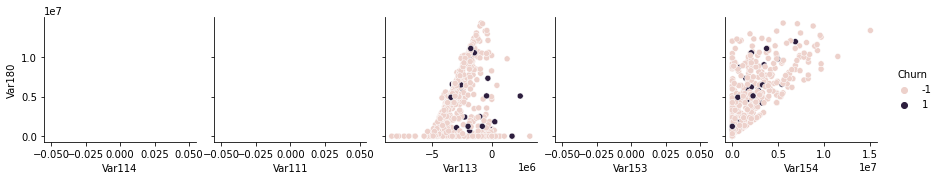

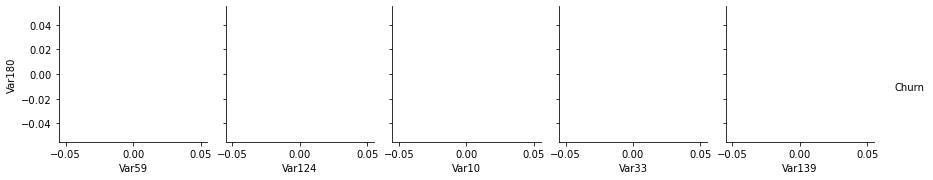

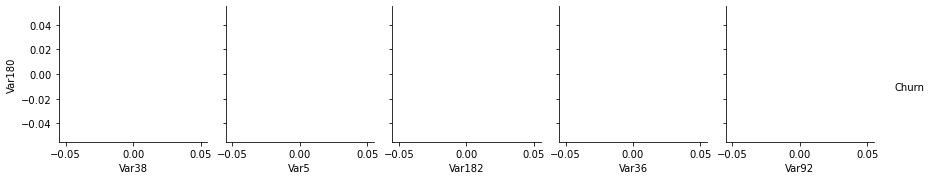

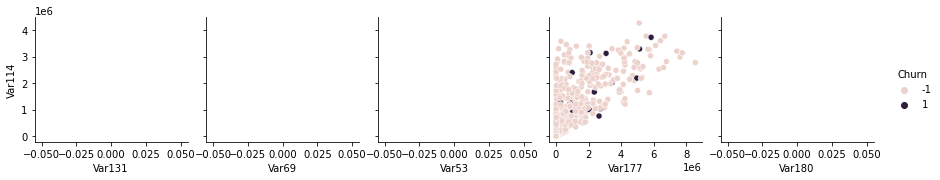

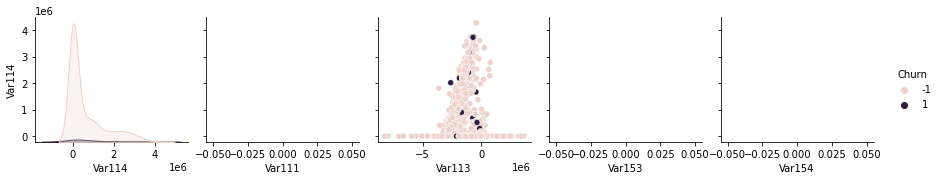

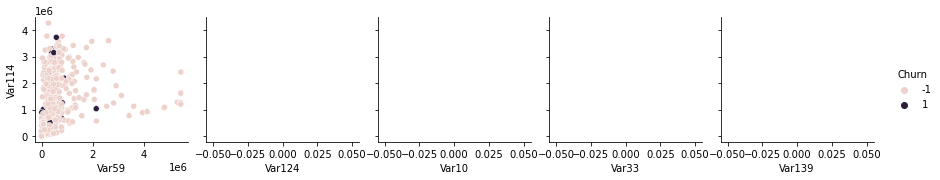

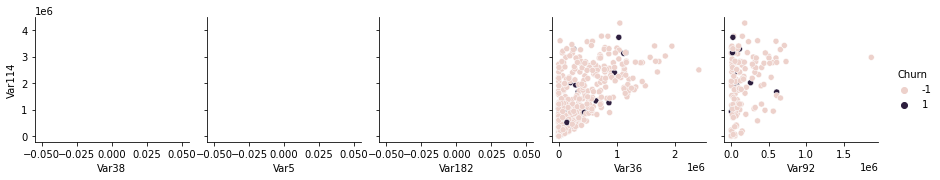

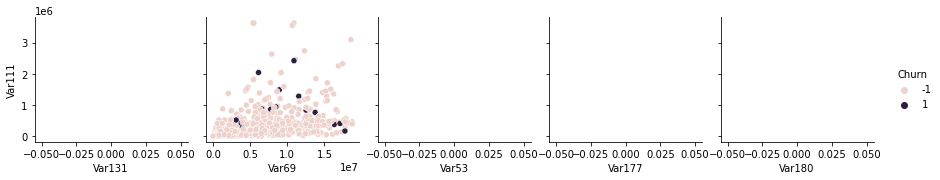

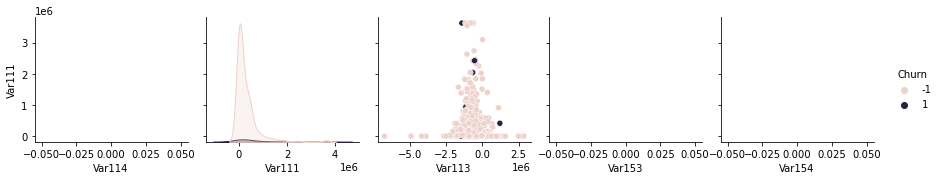

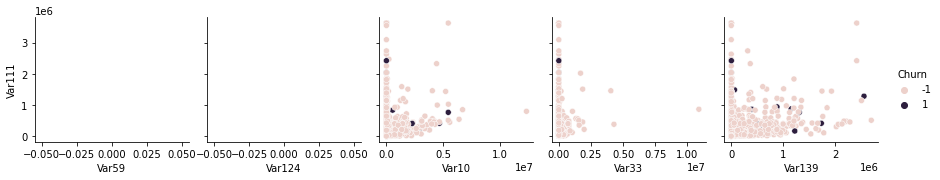

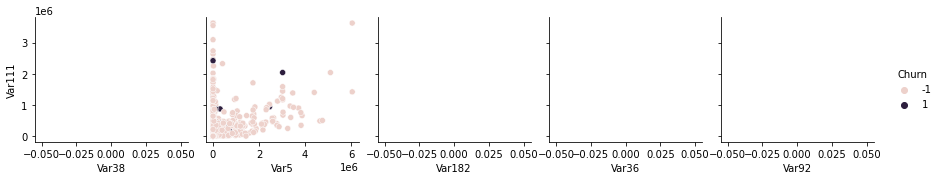

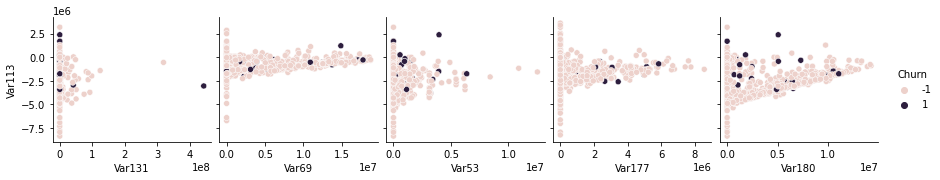

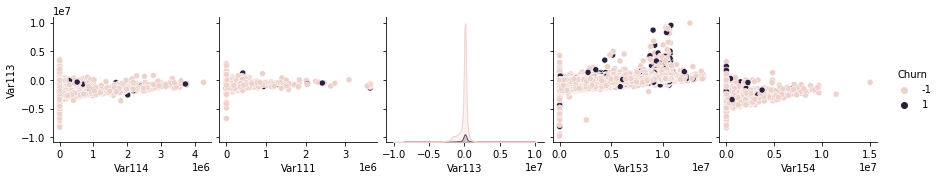

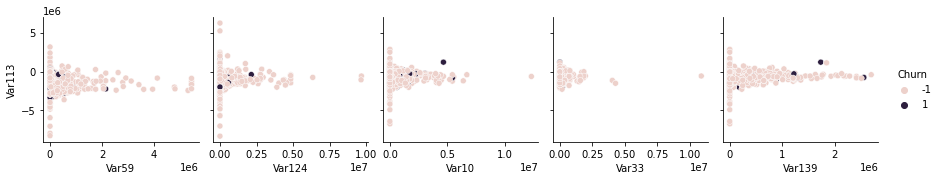

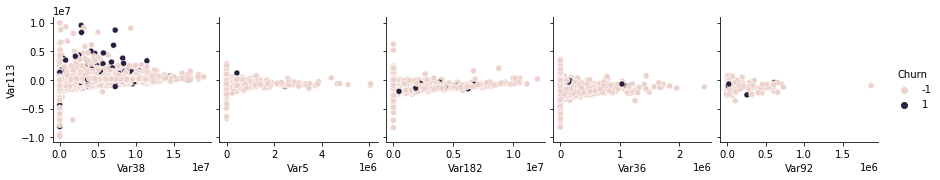

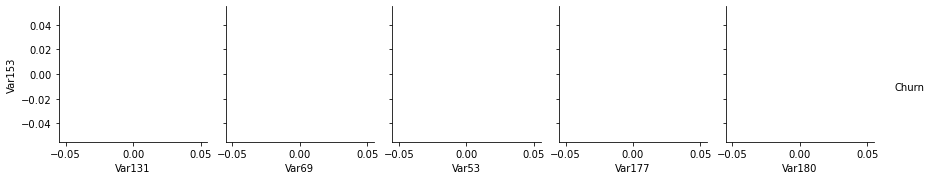

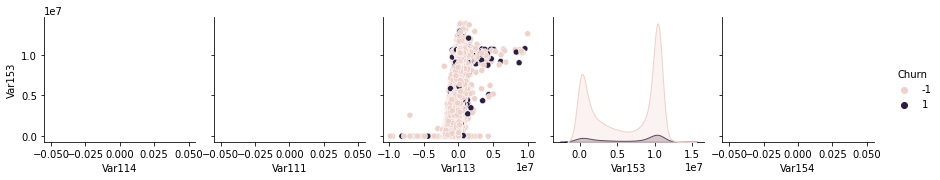

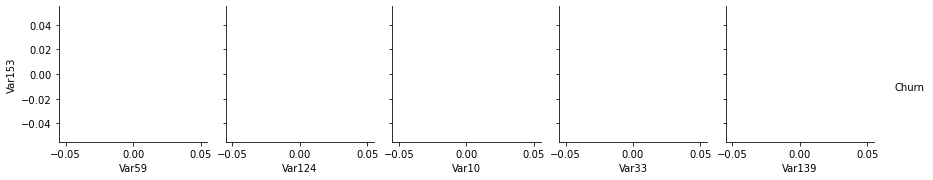

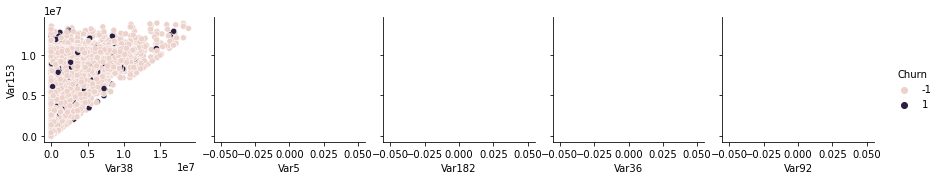

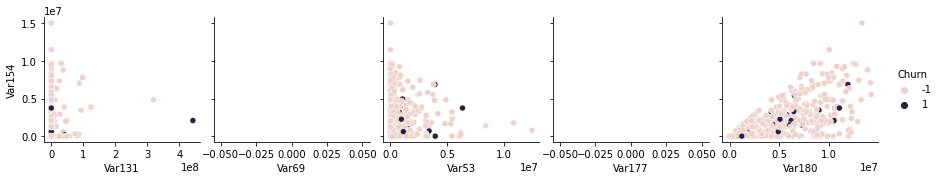

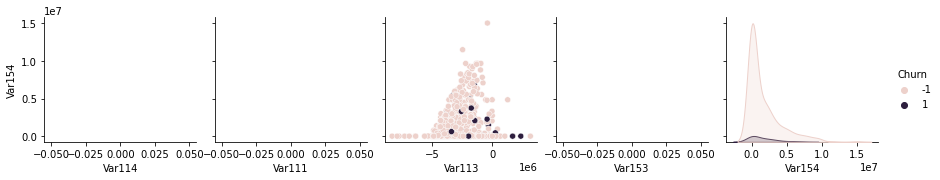

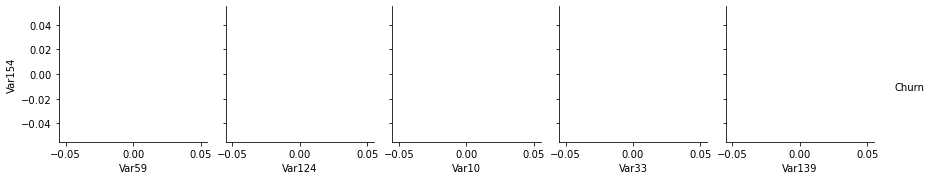

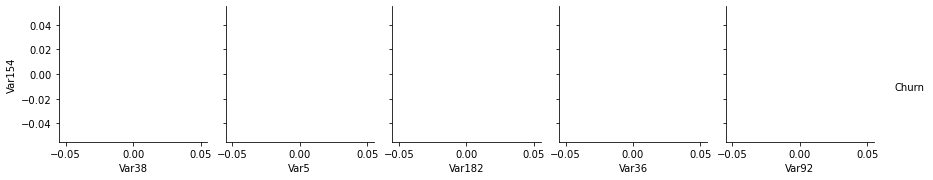

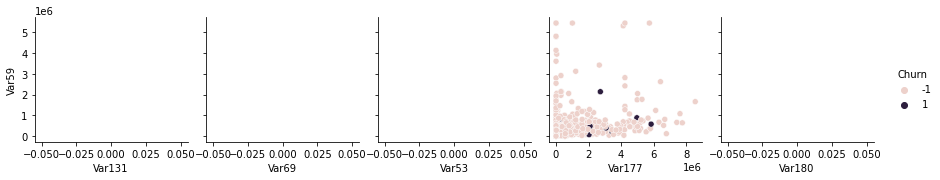

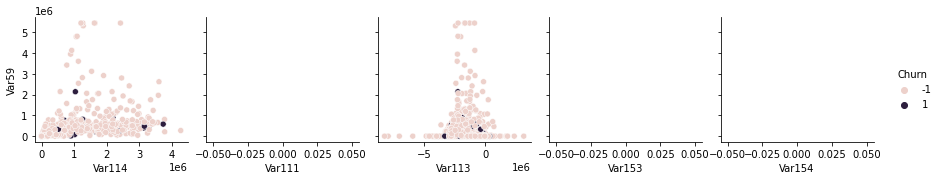

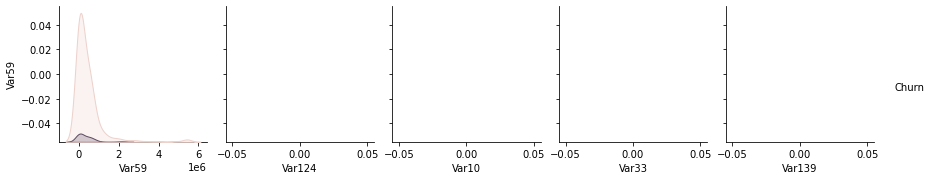

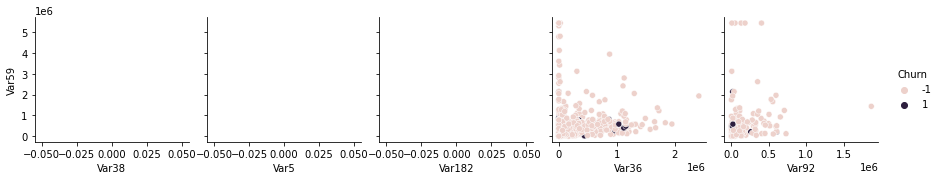

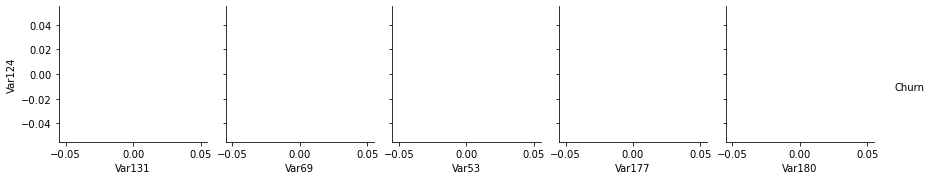

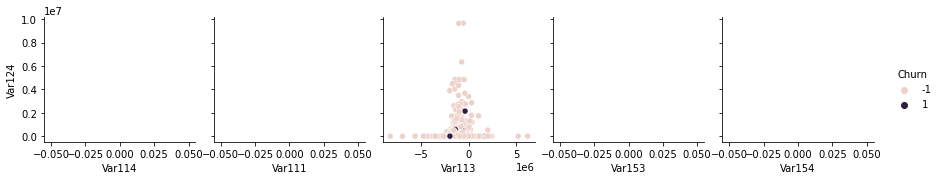

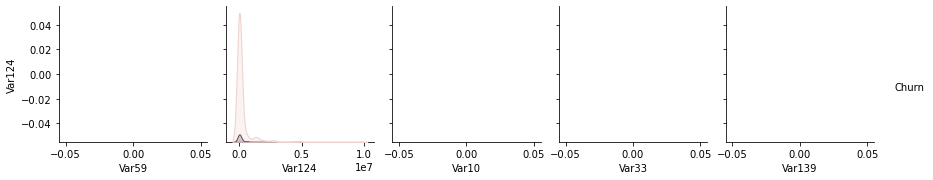

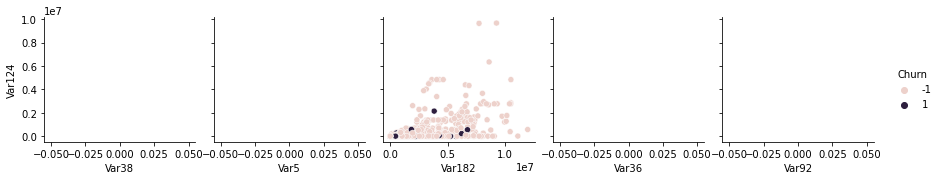

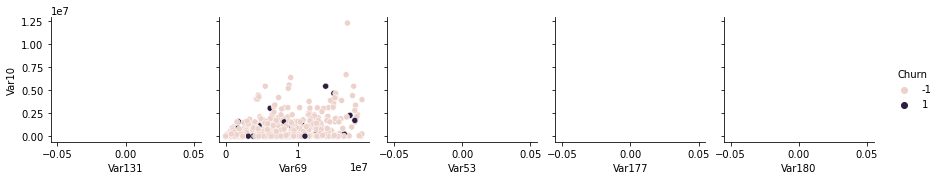

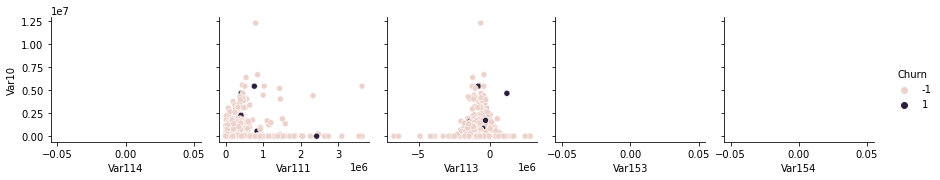

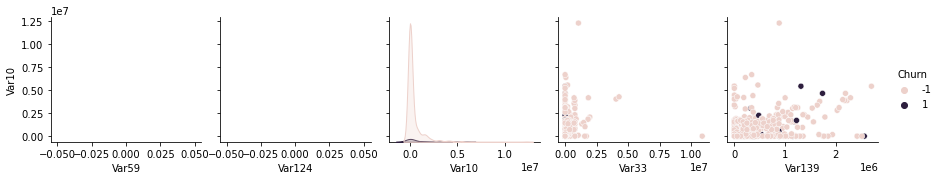

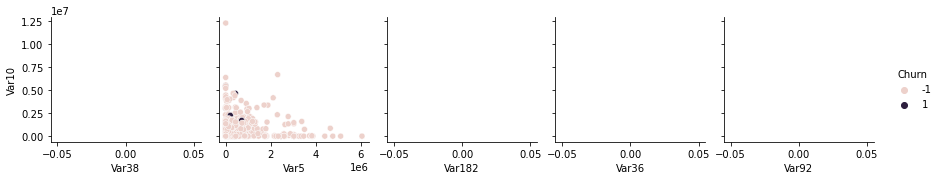

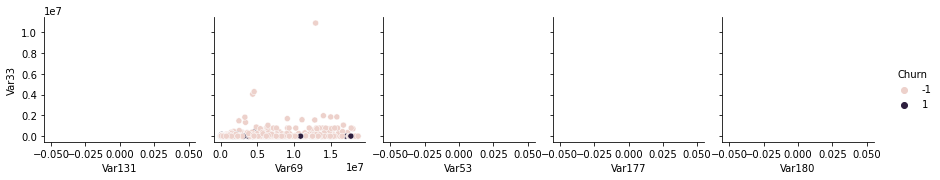

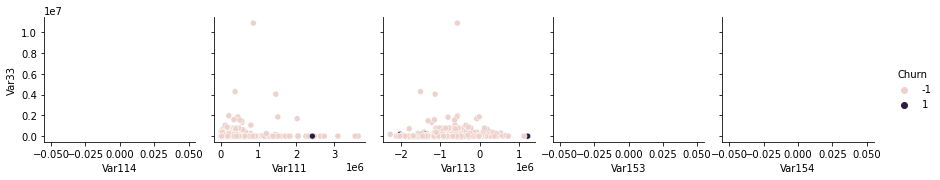

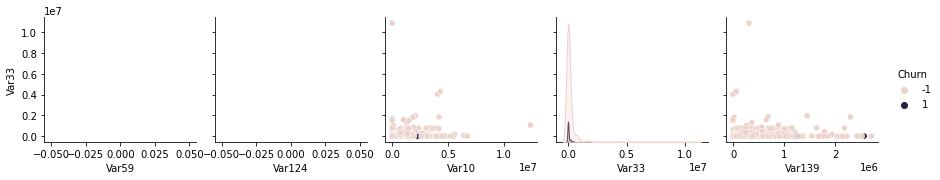

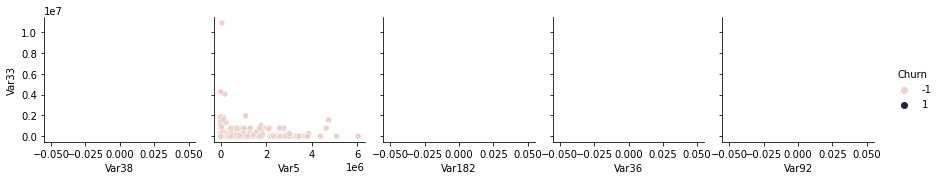

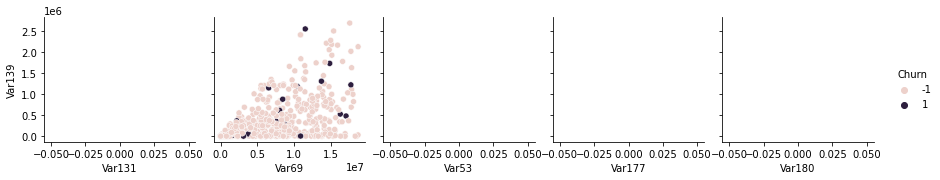

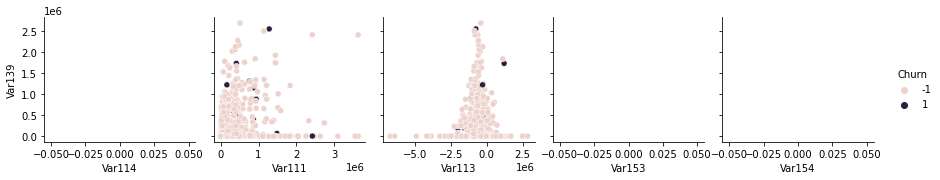

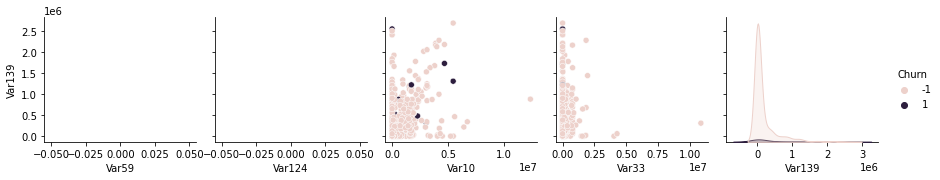

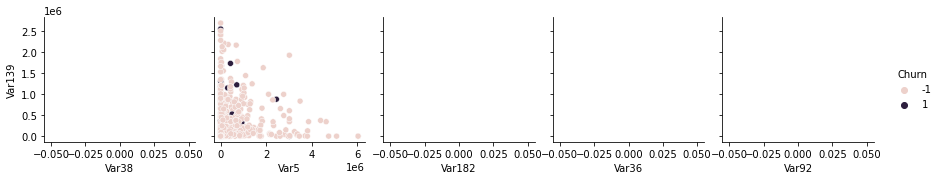

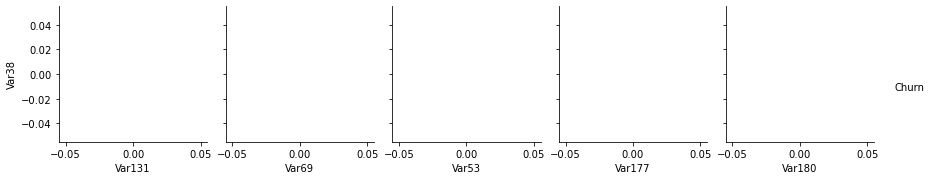

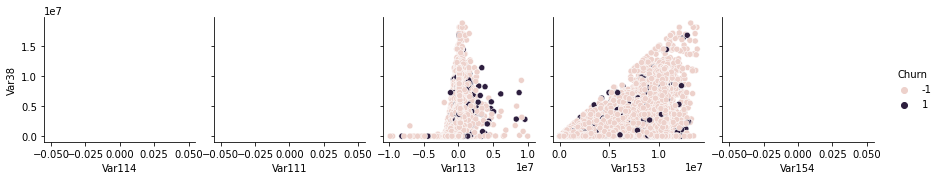

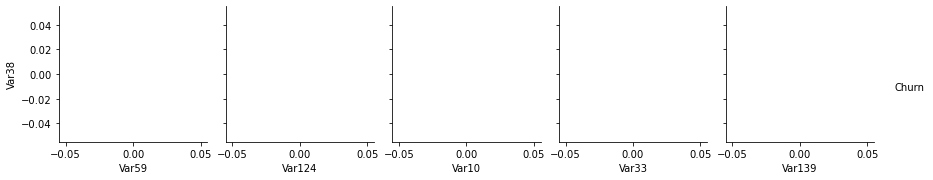

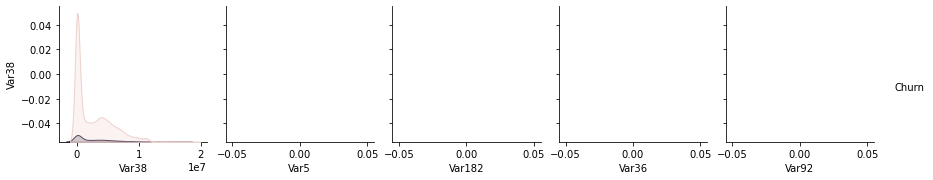

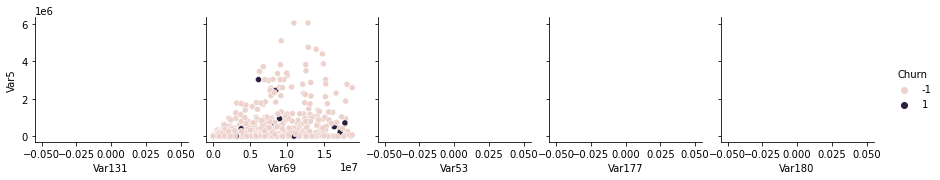

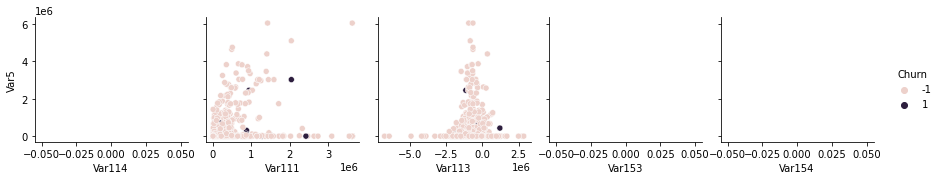

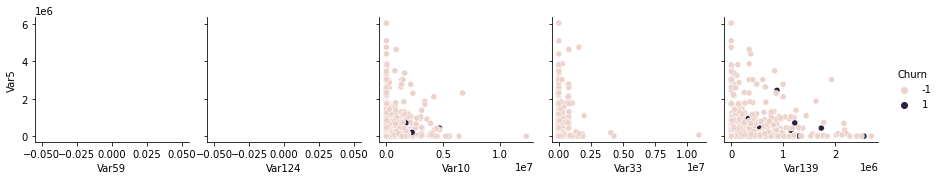

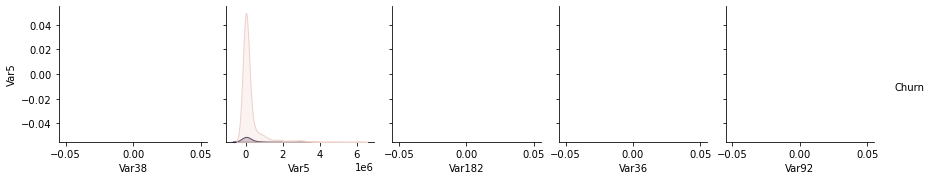

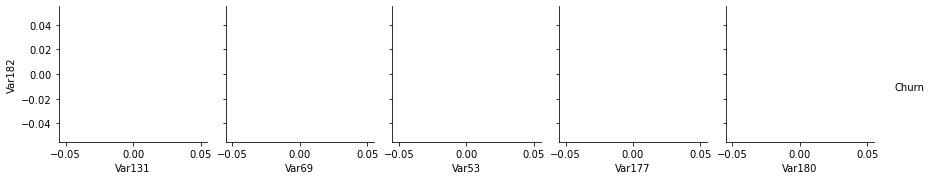

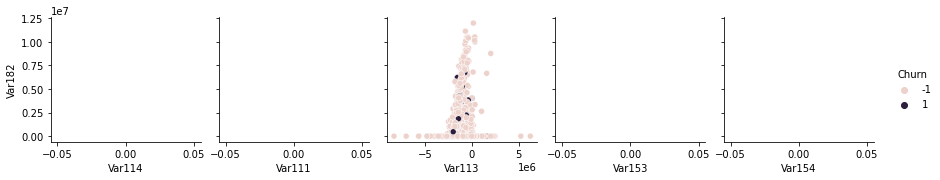

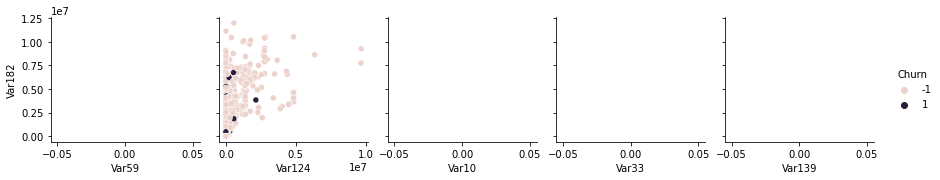

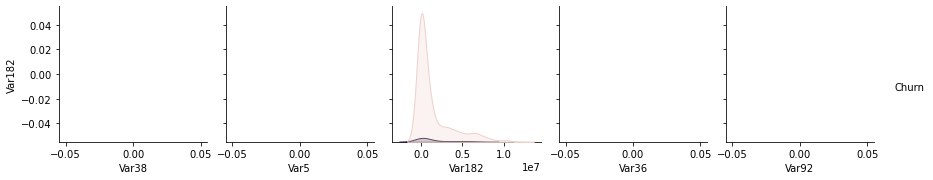

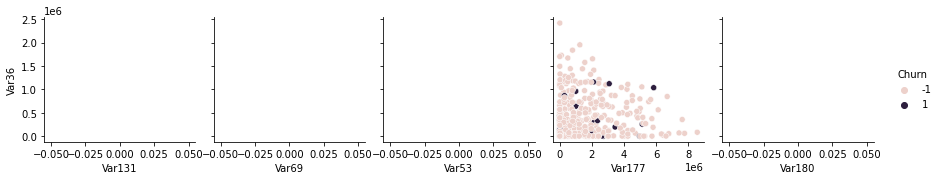

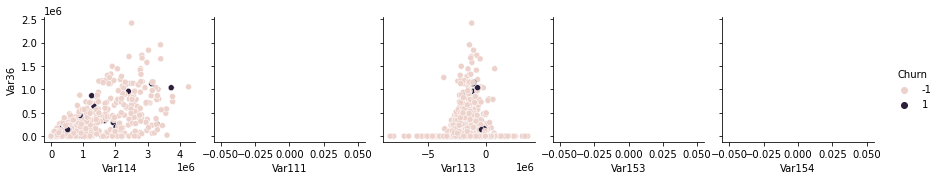

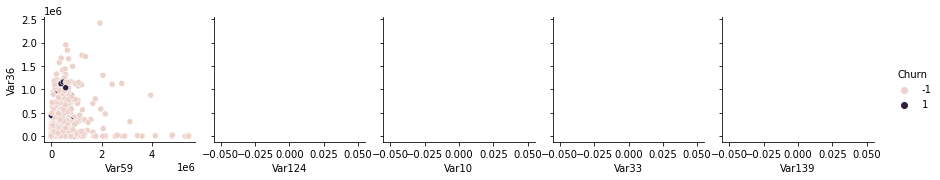

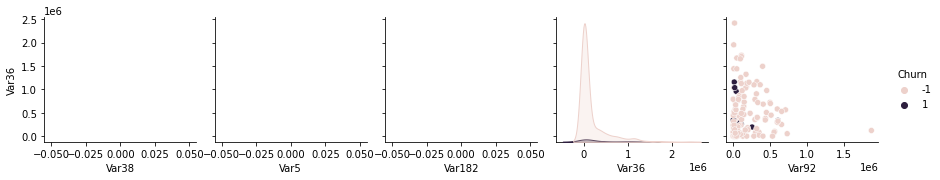

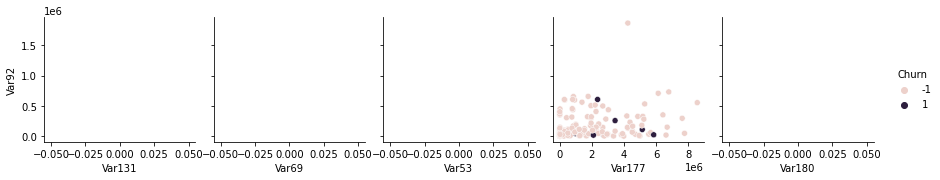

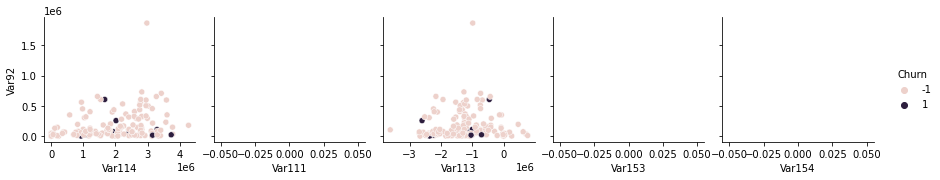

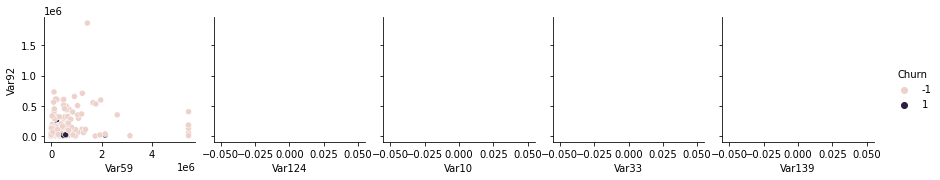

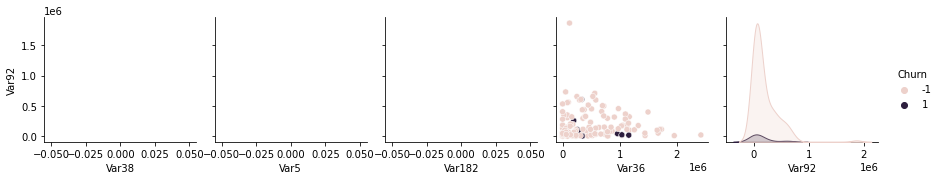

In [114]:
# строим по кускам
def scatter_plot(data, features, hue):
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") # Отключить предупрежение о расходовании памяти
        n = len(features)
        chunk_size = 5
        for feature in features:
            for i in range(0, n, chunk_size):
                sns.pairplot(data, hue=hue, x_vars=features[i:i+chunk_size], y_vars=[feature])

scatter_plot(df, continuous_top20, 'Churn')


5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

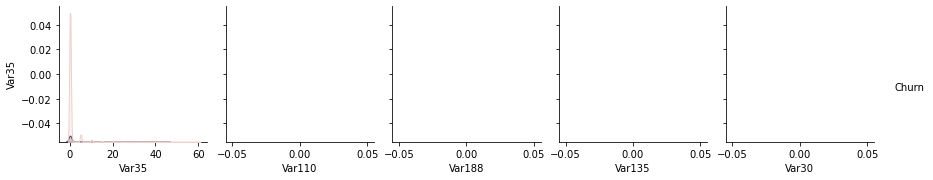

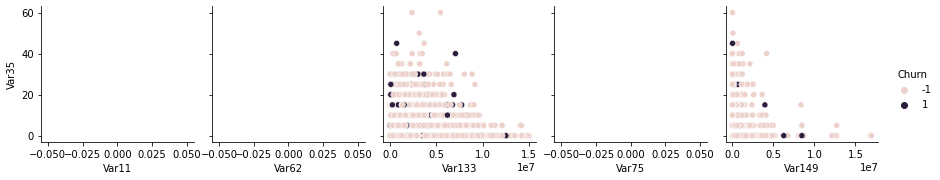

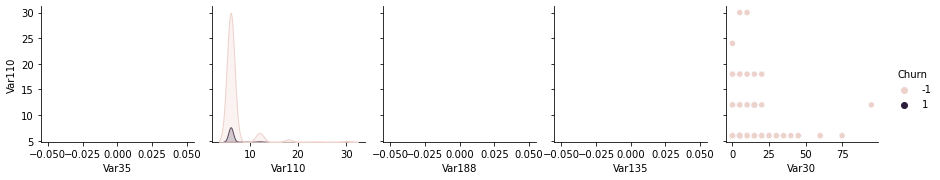

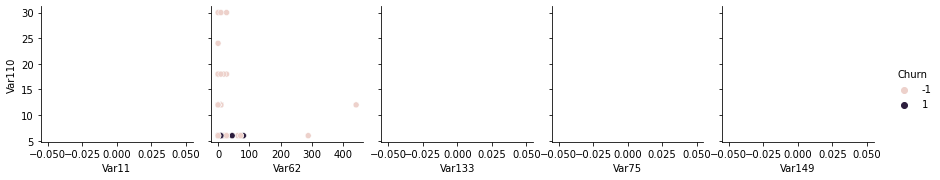

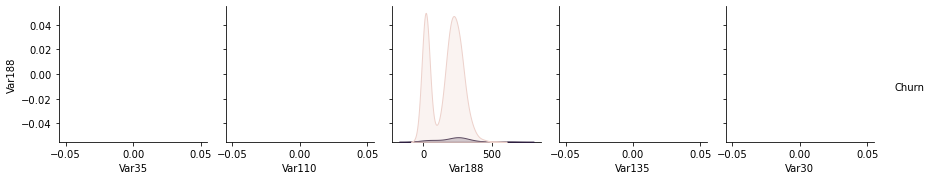

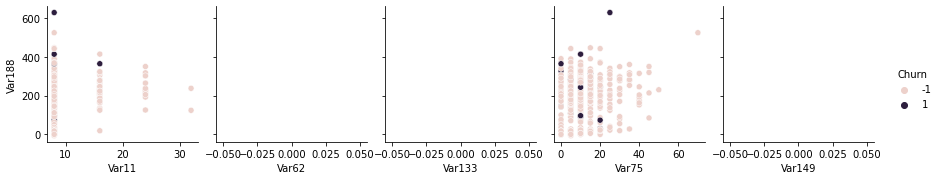

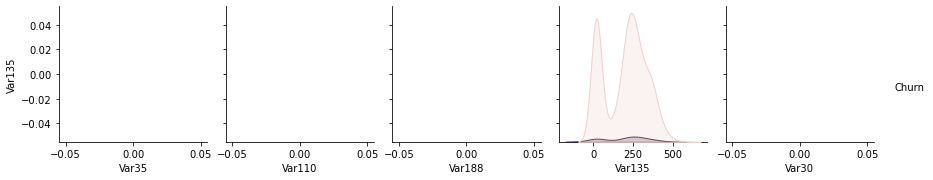

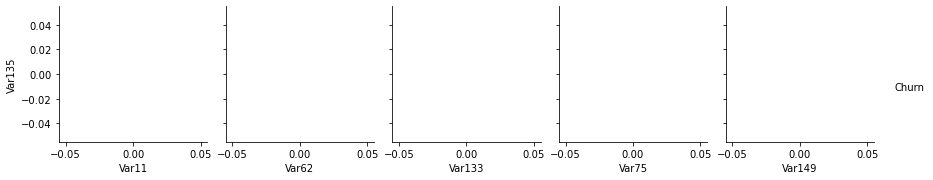

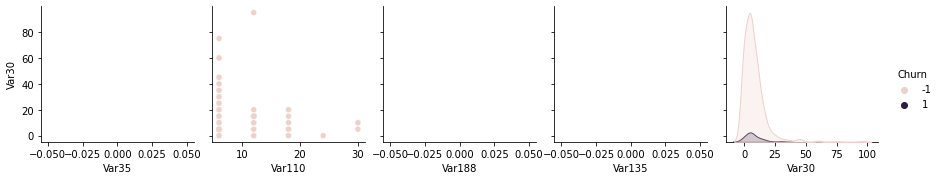

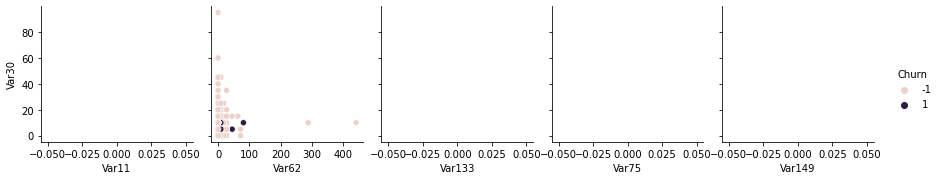

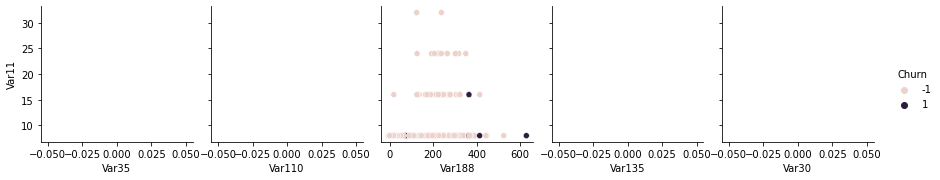

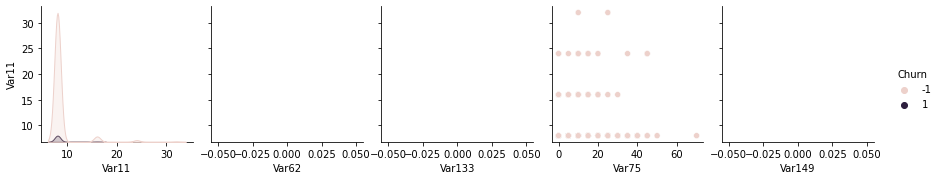

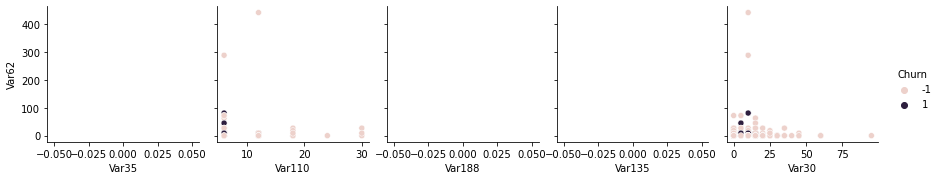

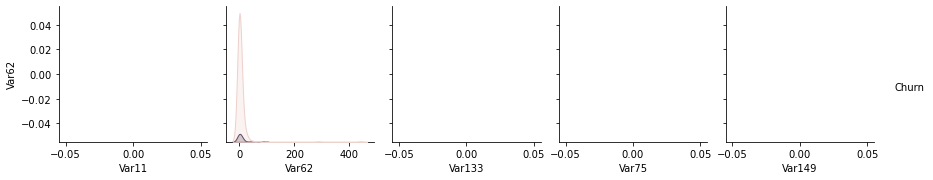

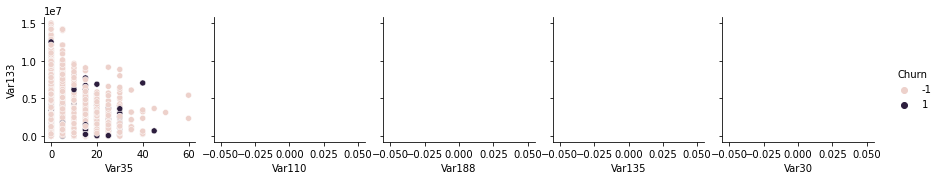

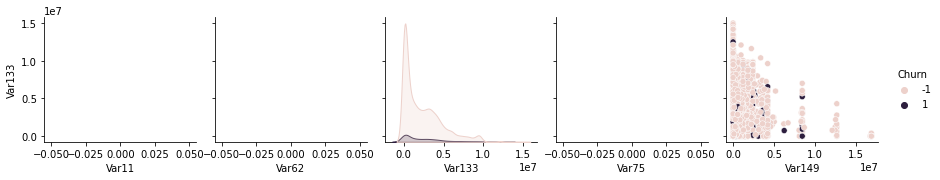

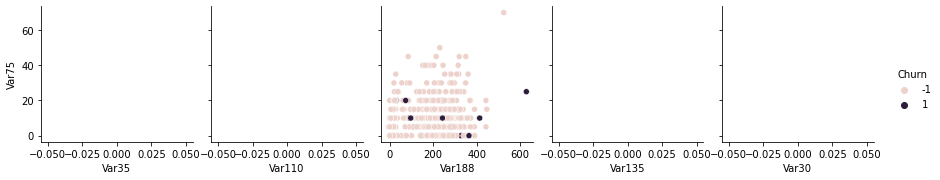

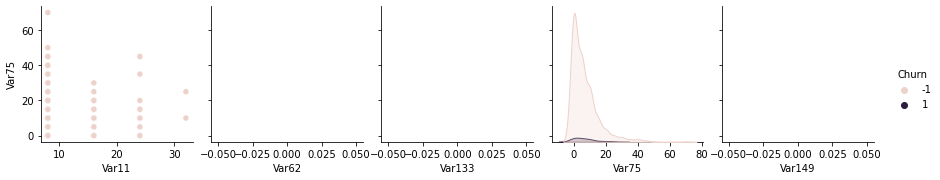

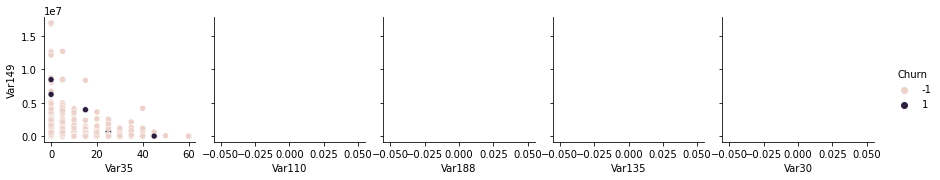

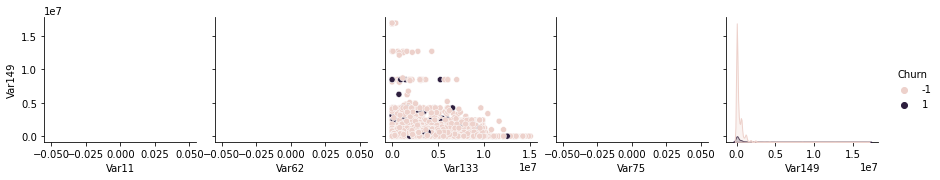

In [124]:
# Плотности распределений на диагонали есть

np.random.seed(0)
continuous_rng = np.random.choice([x for x in df[continuous_mask].columns if x not in continuous_top20], 10, replace=False)
scatter_plot(df, continuous_rng, 'Churn')

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [125]:
continuous_least10 = np.array(sorted(corr_continuous, key=lambda x: np.abs(x[1]), reverse=False)[:10])[::,0]

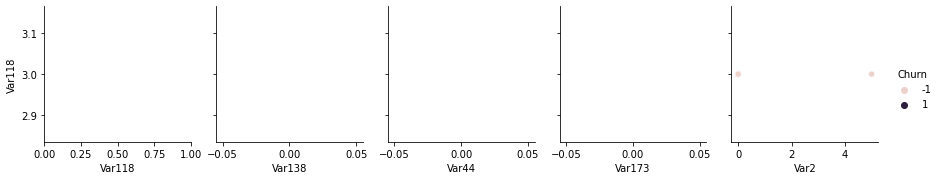

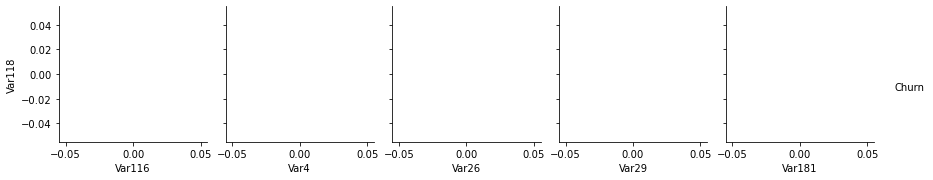

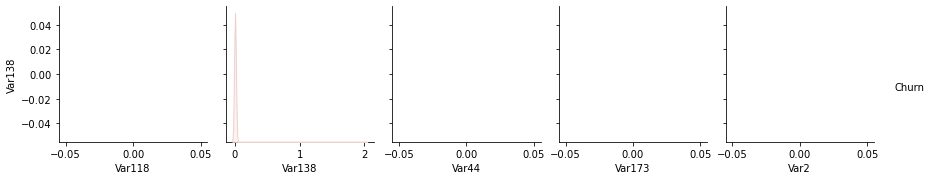

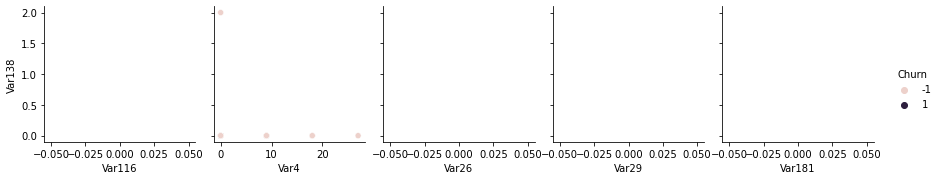

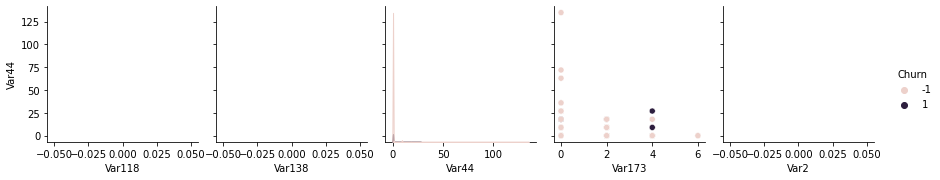

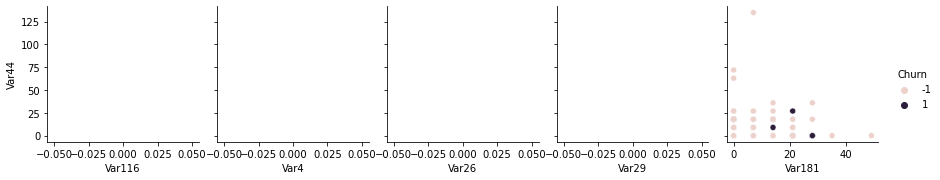

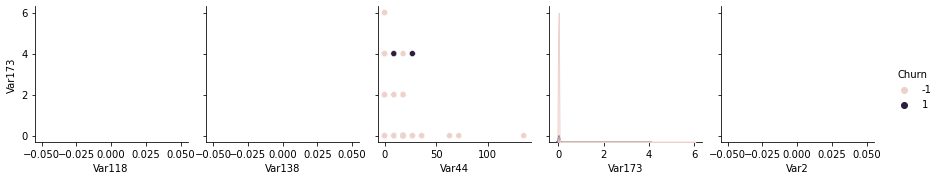

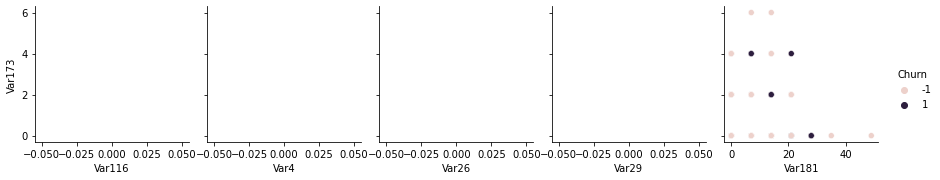

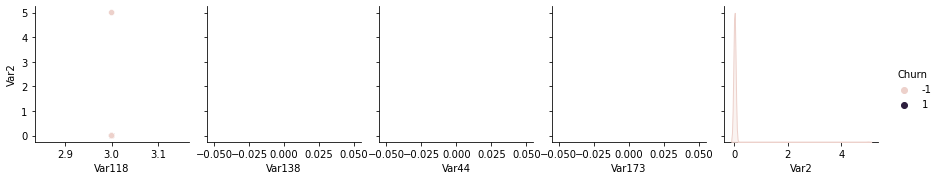

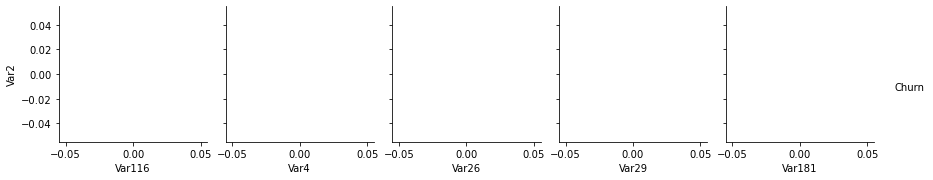

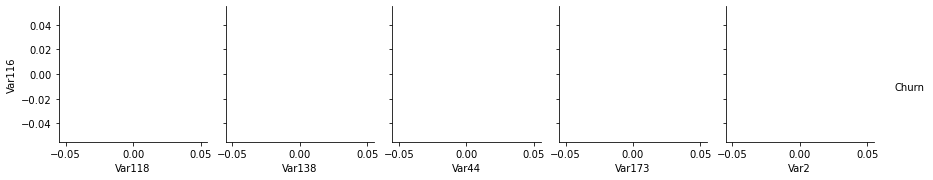

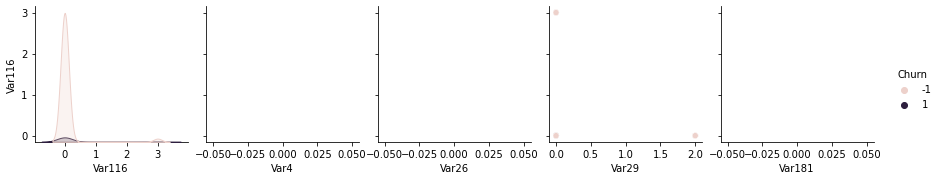

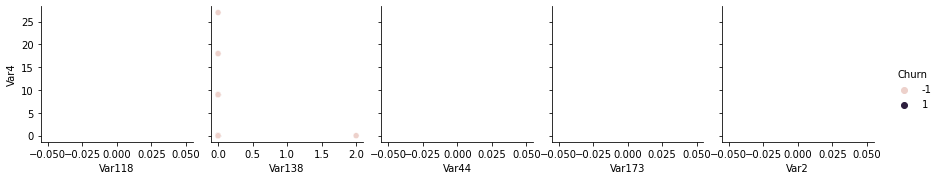

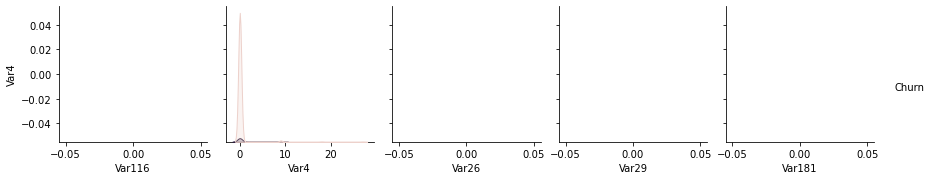

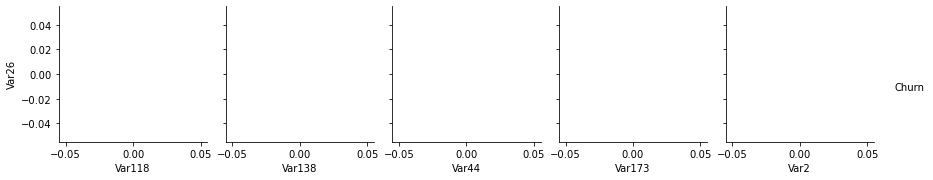

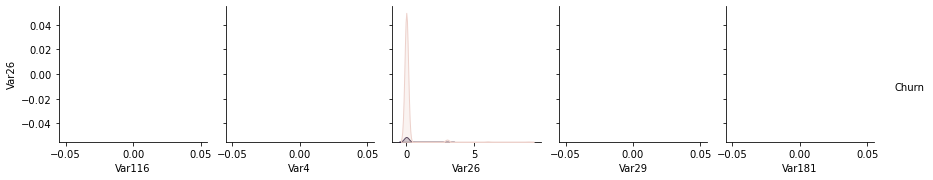

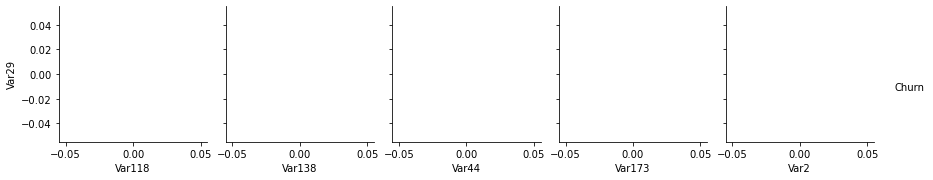

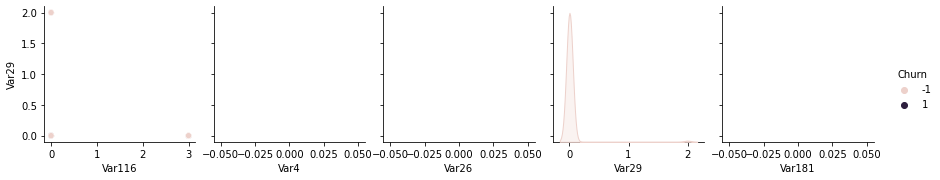

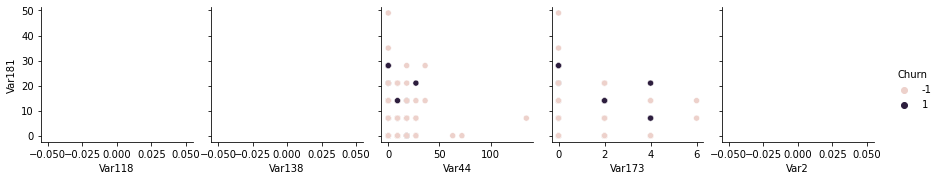

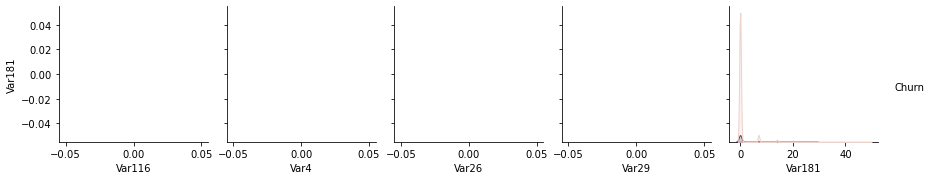

In [126]:
scatter_plot(df, continuous_least10, 'Churn')

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

<Figure size 960x800 with 0 Axes>

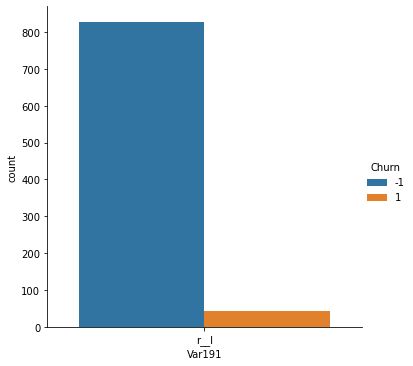

<Figure size 960x800 with 0 Axes>

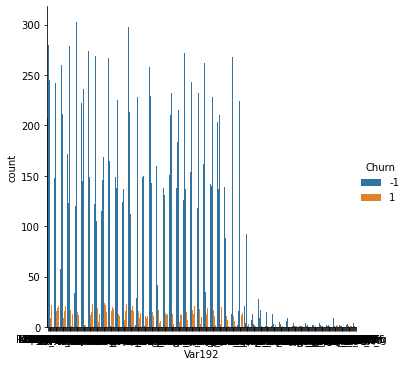

<Figure size 960x800 with 0 Axes>

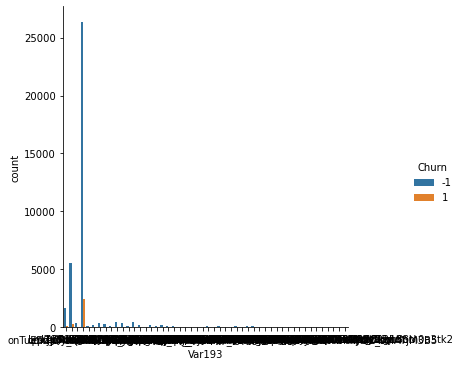

<Figure size 960x800 with 0 Axes>

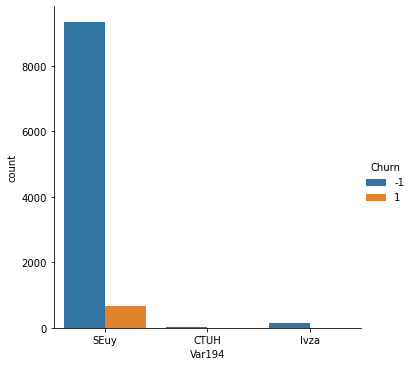

<Figure size 960x800 with 0 Axes>

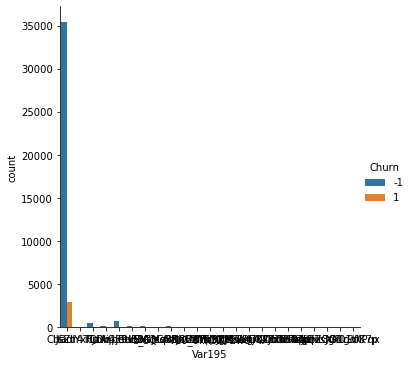

<Figure size 960x800 with 0 Axes>

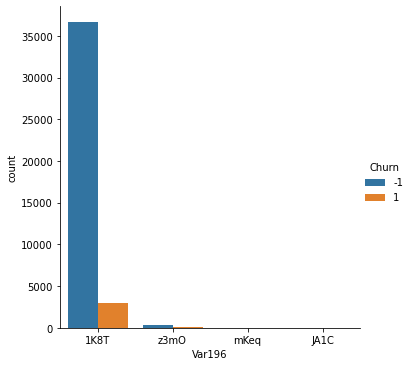

<Figure size 960x800 with 0 Axes>

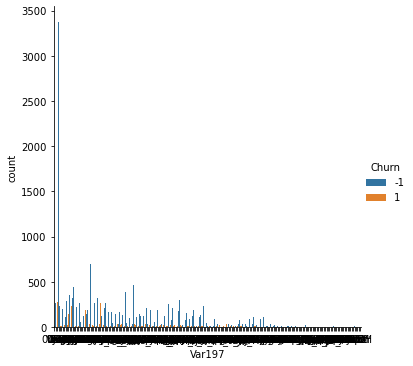

<Figure size 960x800 with 0 Axes>

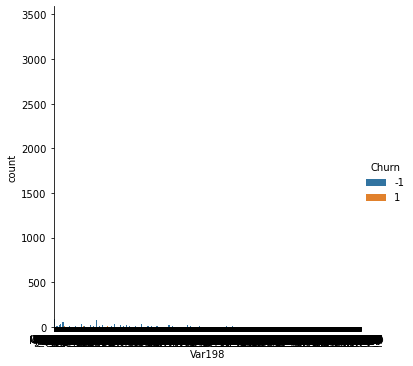

<Figure size 960x800 with 0 Axes>

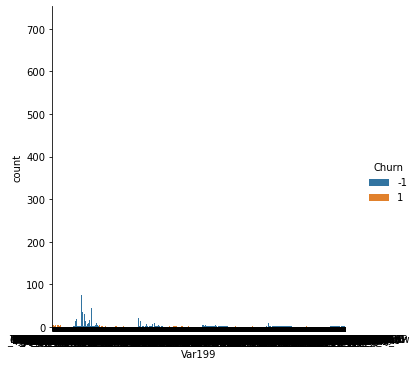

<Figure size 960x800 with 0 Axes>

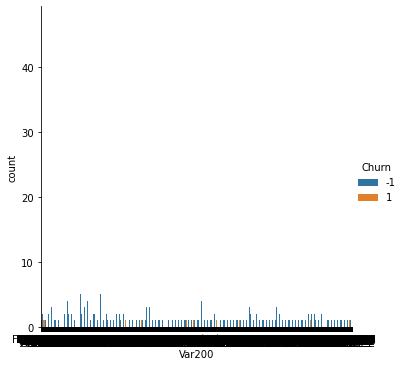

<Figure size 960x800 with 0 Axes>

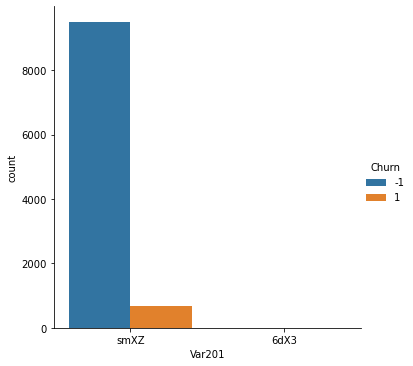

<Figure size 960x800 with 0 Axes>

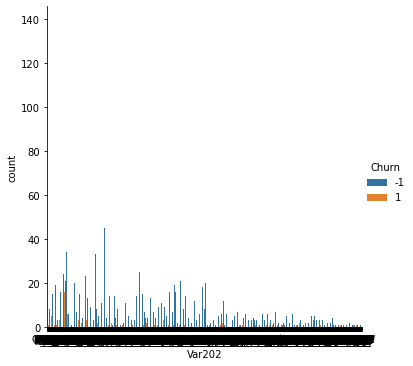

<Figure size 960x800 with 0 Axes>

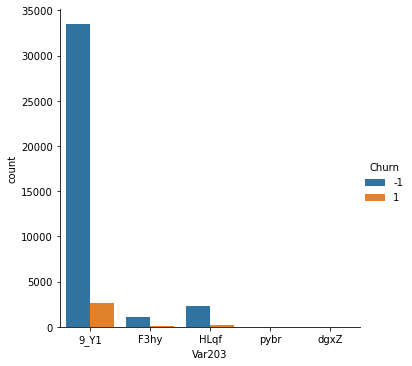

<Figure size 960x800 with 0 Axes>

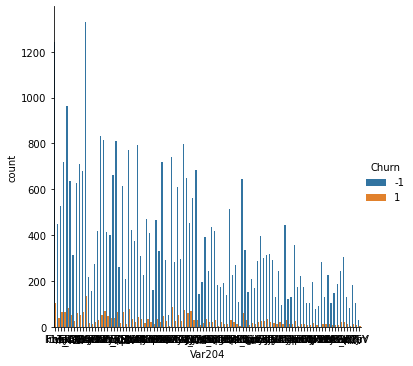

<Figure size 960x800 with 0 Axes>

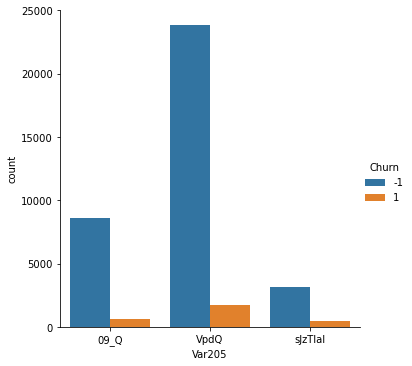

<Figure size 960x800 with 0 Axes>

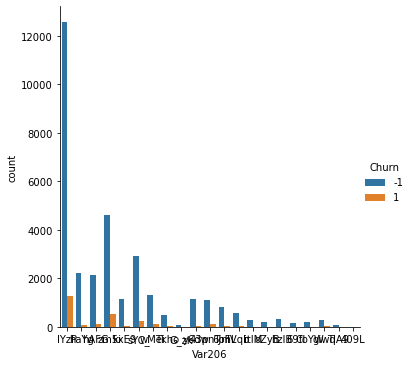

<Figure size 960x800 with 0 Axes>

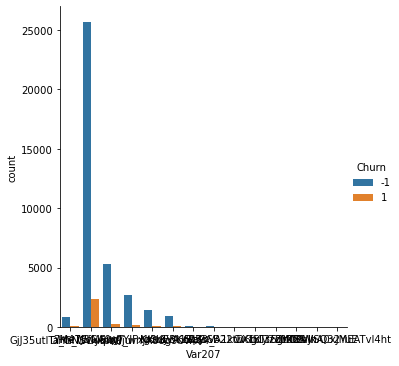

<Figure size 960x800 with 0 Axes>

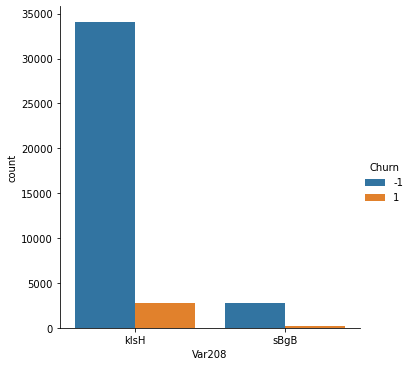

<Figure size 960x800 with 0 Axes>

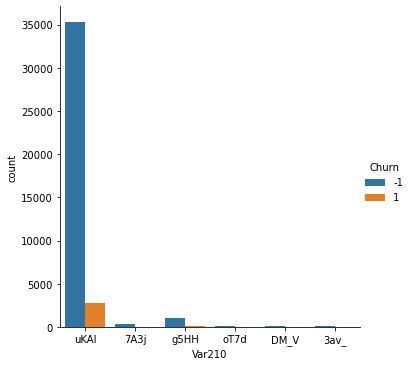

<Figure size 960x800 with 0 Axes>

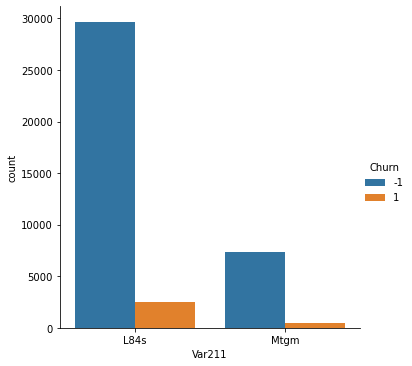

<Figure size 960x800 with 0 Axes>

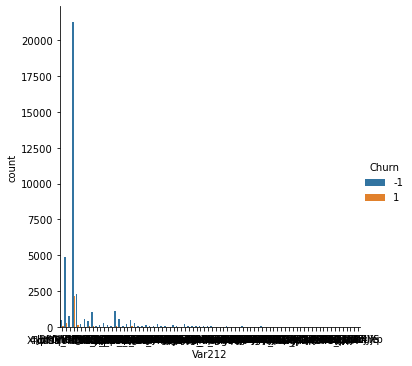

<Figure size 960x800 with 0 Axes>

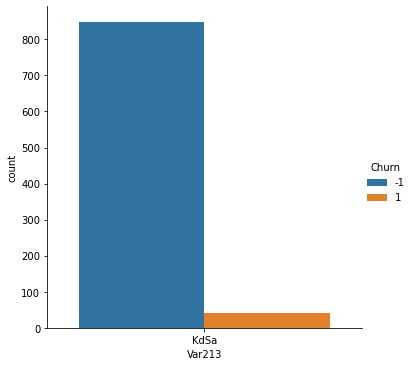

<Figure size 960x800 with 0 Axes>

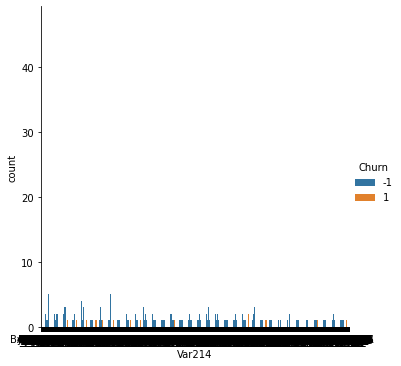

<Figure size 960x800 with 0 Axes>

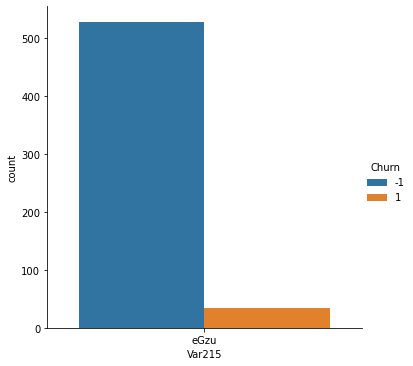

<Figure size 960x800 with 0 Axes>

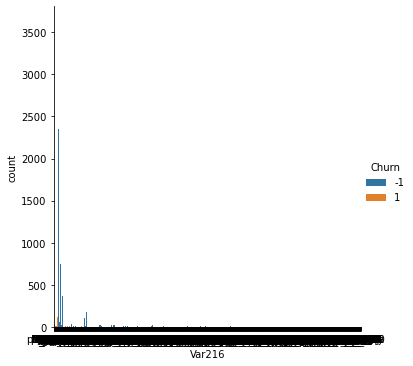

<Figure size 960x800 with 0 Axes>

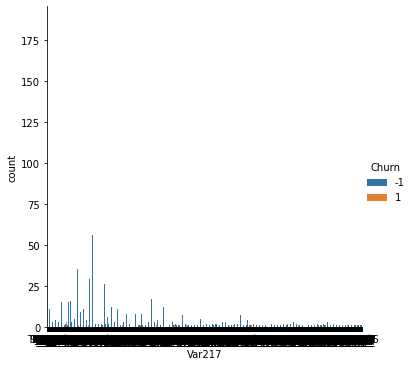

<Figure size 960x800 with 0 Axes>

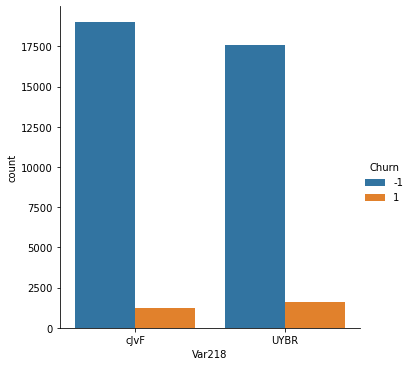

<Figure size 960x800 with 0 Axes>

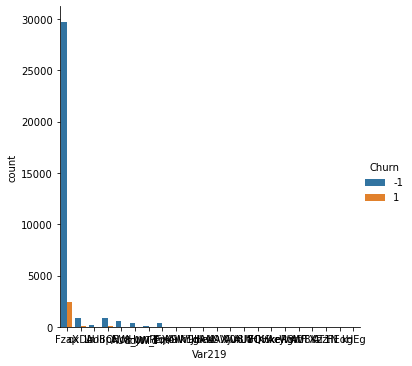

<Figure size 960x800 with 0 Axes>

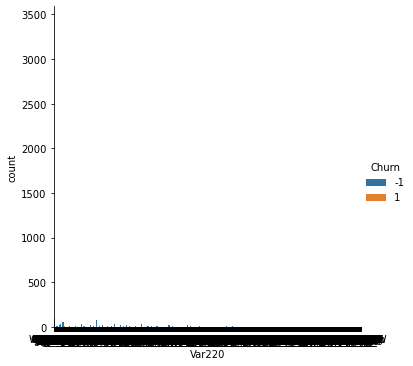

<Figure size 960x800 with 0 Axes>

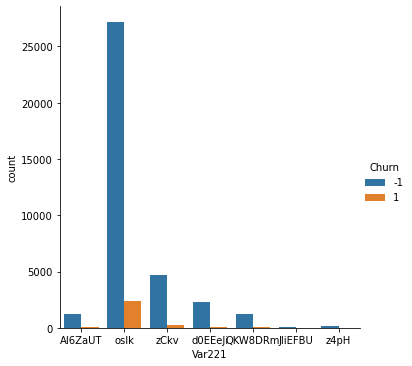

<Figure size 960x800 with 0 Axes>

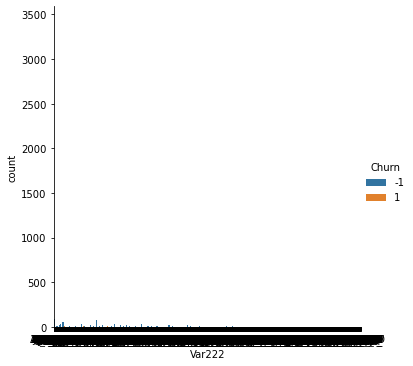

<Figure size 960x800 with 0 Axes>

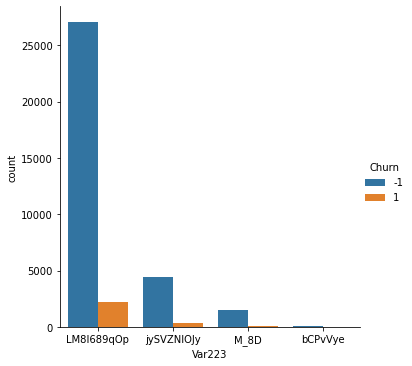

<Figure size 960x800 with 0 Axes>

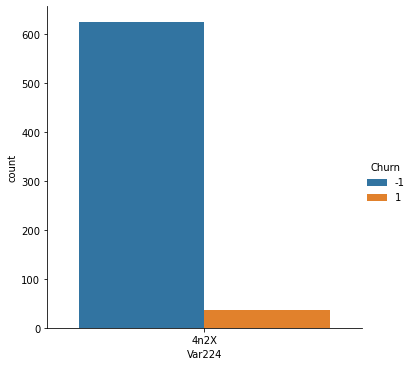

<Figure size 960x800 with 0 Axes>

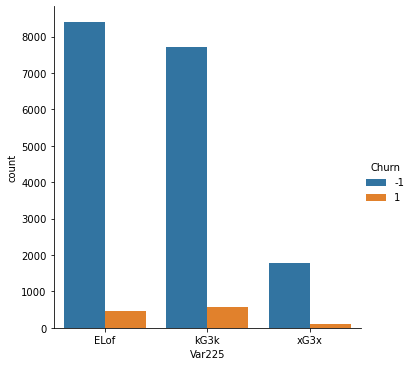

<Figure size 960x800 with 0 Axes>

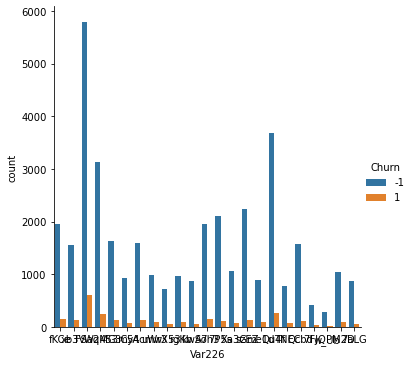

<Figure size 960x800 with 0 Axes>

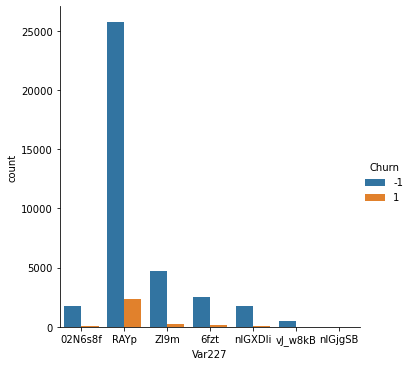

<Figure size 960x800 with 0 Axes>

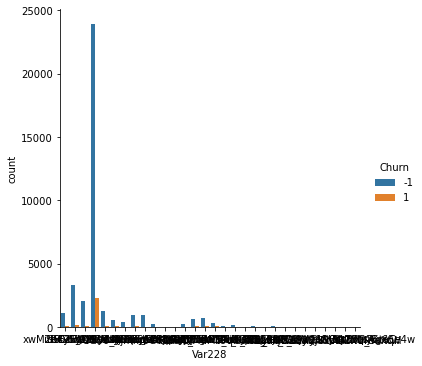

<Figure size 960x800 with 0 Axes>

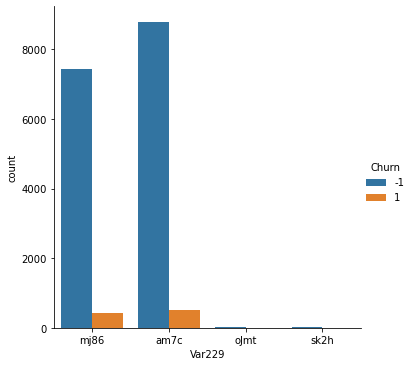

In [136]:
for feature in categorical_mask:
    fig = plt.figure(figsize=(12, 10), dpi=80)
    sns.catplot(data=df, x=feature, kind="count", hue='Churn')

In [154]:
corr_cat = np.array(sorted(corr_categorical, key=lambda x: x[1], reverse=True))
corr_cat

array([['Var205', '0.07383585358605782'],
       ['Var227', '0.05561944547505763'],
       ['Var221', '0.04911882313436707'],
       ['Var210', '0.048540020354891744'],
       ['Var218', '0.044807540425158415'],
       ['Var225', '0.032579394081328164'],
       ['Var211', '0.03205241443357129'],
       ['Var194', '0.0171226447721922'],
       ['Var203', '0.012307583058138536'],
       ['Var196', '0.012235099338811926'],
       ['Var223', '0.010942973483094469'],
       ['Var201', '0.009752315369374685'],
       ['Var208', '0.00950368208519653'],
       ['Var229', '0.005261379267783523'],
       ['Var191', '0.0'],
       ['Var192', '0.0'],
       ['Var193', '0.0'],
       ['Var195', '0.0'],
       ['Var197', '0.0'],
       ['Var198', '0.0'],
       ['Var199', '0.0'],
       ['Var200', '0.0'],
       ['Var202', '0.0'],
       ['Var204', '0.0'],
       ['Var206', '0.0'],
       ['Var207', '0.0'],
       ['Var212', '0.0'],
       ['Var213', '0.0'],
       ['Var214', '0.0'],
       ['Var215

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

1. На графиках распределения вероятности мы видим, что у некоторых непрерывных признаков площадь под кривой больше для оттока: 33 124 59 180
2. Признаки 113 38 154 153 180 на scatter plot хорошо отображают отток. Возможно их стоит включить в модель вместе 
3. Между оттоком и отдельными категориальными признаками установить прямую зависимость не получилось. На гистограммах признаков с небольшим кол-вом категорий распределение оттока примерно одинаковое. Признаки с большим колв-ом категорий также плохо поддаются первичному анализу. Возможно, если посчитать долю оттока для каждой категории, то можно будет выбрать какие-то категориальные признаки 
4. Попытка посчитать коэф V Крамера на категориальных признаках с малым кол-вом категорий (<10) не дала результатов. Но в целом способ отвергать не стоит
5. Признаков много, но среди них очень мало значимых. Простое исключение признаков с доминирующими пропусками сильно облегчит модель. Они и являются шумовыми.

